In [1]:
%pip install matplotlib seaborn statsmodels scikit-learn


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [3]:
df= pd.read_csv("../../data/batdongsan/numerized/ChungCu_numerized-dataset.csv",thousands=',',skipinitialspace=True)
df.head()

,Unnamed: 0,DienTich,DiaChi,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,HuongNha,HuongBanCong,PhapLy,Ward
0,0,50.00,"Dự án D-Aqua, Đường Bến Bình Đông, Phường 14, ...",79.0,776.0,2.250000e+09,1.0,1.0,3.0,10.739294,106.644394,NaN,NaN,NaN,27421.0
1,1,50.00,"The Gold View, 346, Đường Bến Vân Đồn, Phường ...",79.0,773.0,3.700000e+09,1.0,1.0,2.0,10.756248,106.691849,5.0,6.0,4.0,27298.0
2,2,73.00,"The Gloria by Silk Path, số 8, Đường Nguyên Hồ...",1.0,6.0,NaN,2.0,2.0,2.0,21.015852,105.809235,4.0,3.0,1.0,199.0
3,3,33.24,"Dự án Ben Hill Thuận An , Đường Thuận Giao 24,...",74.0,725.0,1.000000e+09,1.0,NaN,NaN,21.026758,105.841194,NaN,NaN,NaN,25972.0
4,4,110.00,"Dự án Seasons Avenue, Phường Mỗ Lao, Hà Đông, ...",1.0,268.0,5.500000e+09,3.0,2.0,2.0,20.987026,105.786835,6.0,5.0,1.0,9541.0


In [4]:
df=df.drop(columns="Unnamed: 0")

In [5]:
## Mình sẽ chỉ lấy những data có dữ liệu về diện tích 
df1 = df[df.DienTich.notnull()]

In [6]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.SoPhongNgu.notnull()]

In [7]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.SoToilet.notnull()]
df3 = df3.reset_index()
df3=df3.drop(columns="index")

# Giải thích về describe()

##### count: Số lượng quan sát không bị thiếu cho mỗi cột.
##### mean: Trung bình cộng của các giá trị trong mỗi cột.
##### std: Độ lệch chuẩn, đo lường mức độ phân tán của dữ liệu so với giá trị trung bình.
##### min: Giá trị nhỏ nhất trong cột.
##### 25%: Giá trị tại vị trí 25% của dữ liệu khi đã được sắp xếp theo thứ tự tăng dần.
##### 50%: Giá trị trung vị (giá trị giữa khi dữ liệu được sắp xếp theo thứ tự tăng dần).
##### 75%: Giá trị tại vị trí 75% của dữ liệu khi đã được sắp xếp theo thứ tự tăng dần.
##### max: Giá trị lớn nhất trong cột.


In [8]:
df3.DienTich = df3.DienTich.astype('float')
df3.SoPhongNgu = df3.SoPhongNgu.astype('float') 
df3.SoToilet = df3.SoToilet.astype('float') 
df3.MucGia = df3.MucGia.astype('float') 
df3.describe()

,DienTich,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,HuongNha,HuongBanCong,PhapLy,Ward
count,21053.000000,21053.000000,20965.000000,1.887200e+04,21053.000000,21053.000000,16722.000000,21027.000000,21027.000000,8958.000000,9785.00000,17438.000000,20286.000000
mean,88.379453,39.097041,399.688528,5.435922e+09,2.336959,1.940674,2.134972,16.199983,106.373385,5.565193,5.52979,1.761613,14403.160012
std,45.803650,36.779379,346.341707,2.286278e+10,0.960250,1.935165,0.676056,4.978099,0.705878,1.981815,1.76176,1.278818,12318.114071
min,20.000000,1.000000,1.000000,1.560000e+06,1.000000,1.000000,0.000000,9.943632,103.840729,1.000000,1.00000,0.000000,4.000000
25%,63.400000,1.000000,18.000000,2.500000e+09,2.000000,2.000000,2.000000,10.790362,105.800255,5.000000,5.00000,1.000000,571.000000
50%,77.000000,38.000000,326.000000,3.800000e+09,2.000000,2.000000,2.000000,20.830246,106.593430,6.000000,6.00000,1.000000,14803.000000
75%,101.000000,79.000000,767.000000,5.900000e+09,3.000000,2.000000,3.000000,21.005226,106.726097,7.000000,7.00000,2.000000,27049.000000
max,833.000000,93.000000,932.000000,3.000000e+12,38.000000,255.000000,3.000000,22.464010,109.241501,8.000000,8.00000,4.000000,31363.000000


In [9]:
df3['USD'] = round(df3['MucGia']/25345,0)
rows  = df3[df3.DienTich > 500]
df3 = df3.drop(index = rows.index)
rows  = df3[df3.SoToilet > 50]
df3 = df3.drop(index = rows.index)
rows  = df3[df3.SoToilet > 35]
df3 = df3.drop(index = rows.index)
df3['log_price'] = np.log(df3.USD)

In [10]:
df3.to_csv('../../data/batdongsan/log_price/ChungCu-dataset.csv',encoding="utf-8-sig",index=False)

In [11]:
df3 = df3.dropna(subset=['MucGia'])


# Trực quan hóa dữ liệu

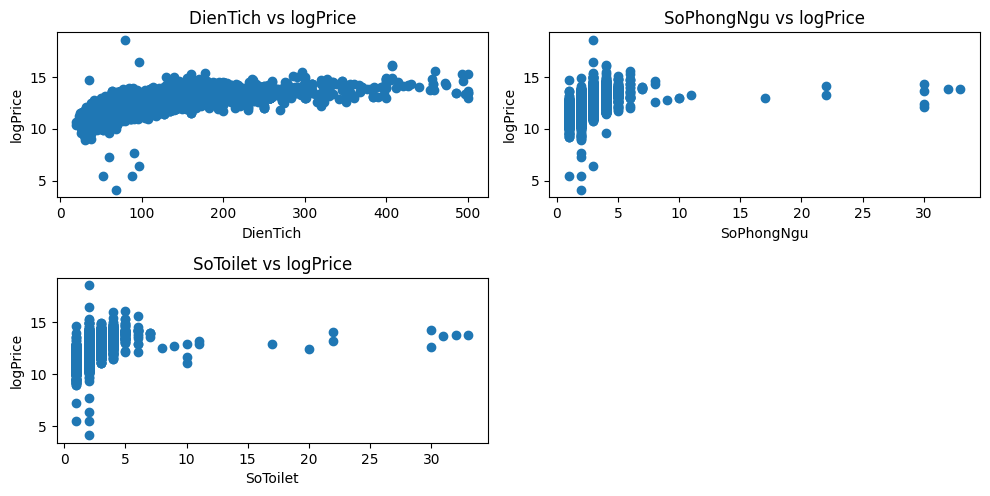

In [12]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df3[x],df3['log_price'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('SoPhongNgu', 2)
scatter('SoToilet', 3)

plt.tight_layout()

Diện tích, số phòng ngủ, số toilet có ảnh hưởng đến giá

# Trực quan những categorical

In [13]:
import json
import pandas as pd
import numpy as np

# Function to load the JSON data into a dictionary
def load_dvhc_dict(file_name):
    with open(file_name, "r", encoding="utf8") as dvhc_file:
        dvhc_json = json.load(dvhc_file)["data"]
        dvhc_dict = {}

        for level_1 in dvhc_json:
            dvhc_dict[level_1["level1_id"]] = level_1["name"]
            for level_2 in level_1["level2s"]:
                dvhc_dict[level_2["level2_id"]] = level_2["name"]
                for level_3 in level_2["level3s"]:
                    dvhc_dict[level_3["level3_id"]] = level_3["name"]

    return dvhc_dict

# Path to the JSON data
json_path = "../../data/donvihanhchinhvn/dvhcvn_2024.json"
json_path_1 = "../../data/donvihanhchinhvn/dvhcvn_2020.json"

# Load the dictionary
dvhc_dict = load_dvhc_dict(json_path)
dvhc_dict_1 = load_dvhc_dict(json_path_1)

# Function to get name from ID with debugging and conversion from string
def get_name_from_id(id, dvhc_dict, dvhc_dict_1):
    if pd.isna(id):
        return "ID not found"
    if id in dvhc_dict:
        return dvhc_dict[id]
    if id in dvhc_dict_1:
        return dvhc_dict_1[id]
    else:
        return "ID not found"

# Function to format IDs with leading zeros
def format_id(id, length):
    try:
        return str(int(id)).zfill(length)  # Convert to int before zfill to handle float
    except ValueError:
        return None  # In case of invalid ID

# Function to convert city, district, and ward IDs to names with formatting and error tracking
def convert_ids_to_names(df, dvhc_dict, dvhc_dict_1):
    # Track errors and their details

    # Apply conversion to City
    df['City'] = df['City'].apply(lambda x: get_name_from_id(format_id(x, 2), dvhc_dict, dvhc_dict_1))
    # Apply conversion to District
    df['District'] = df['District'].apply(lambda x: get_name_from_id(format_id(x, 3), dvhc_dict, dvhc_dict_1))
    # Apply conversion to Ward
    df['Ward'] = df['Ward'].apply(lambda x: get_name_from_id(format_id(x, 5), dvhc_dict, dvhc_dict_1))
    # Print errors
    # Clean up the DataFrame by dropping the name columns
    return df

# Apply the conversion function to the DataFrame
frame1 = convert_ids_to_names(df3, dvhc_dict, dvhc_dict_1)


In [14]:
frame1 = df3[["DiaChi",'City','District','Ward','NoiThat','HuongNha','HuongBanCong','PhapLy','MucGia','USD']]
bins = [40000,90000,250000,118366500]

In [15]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left', on=col)
    cars_bin = ['Low', 'Medium', 'High']
    frame1['range'] = pd.cut(temp['USD_x'], bins, right=False, labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col, 'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('House Range vs Price')
    plt.show()

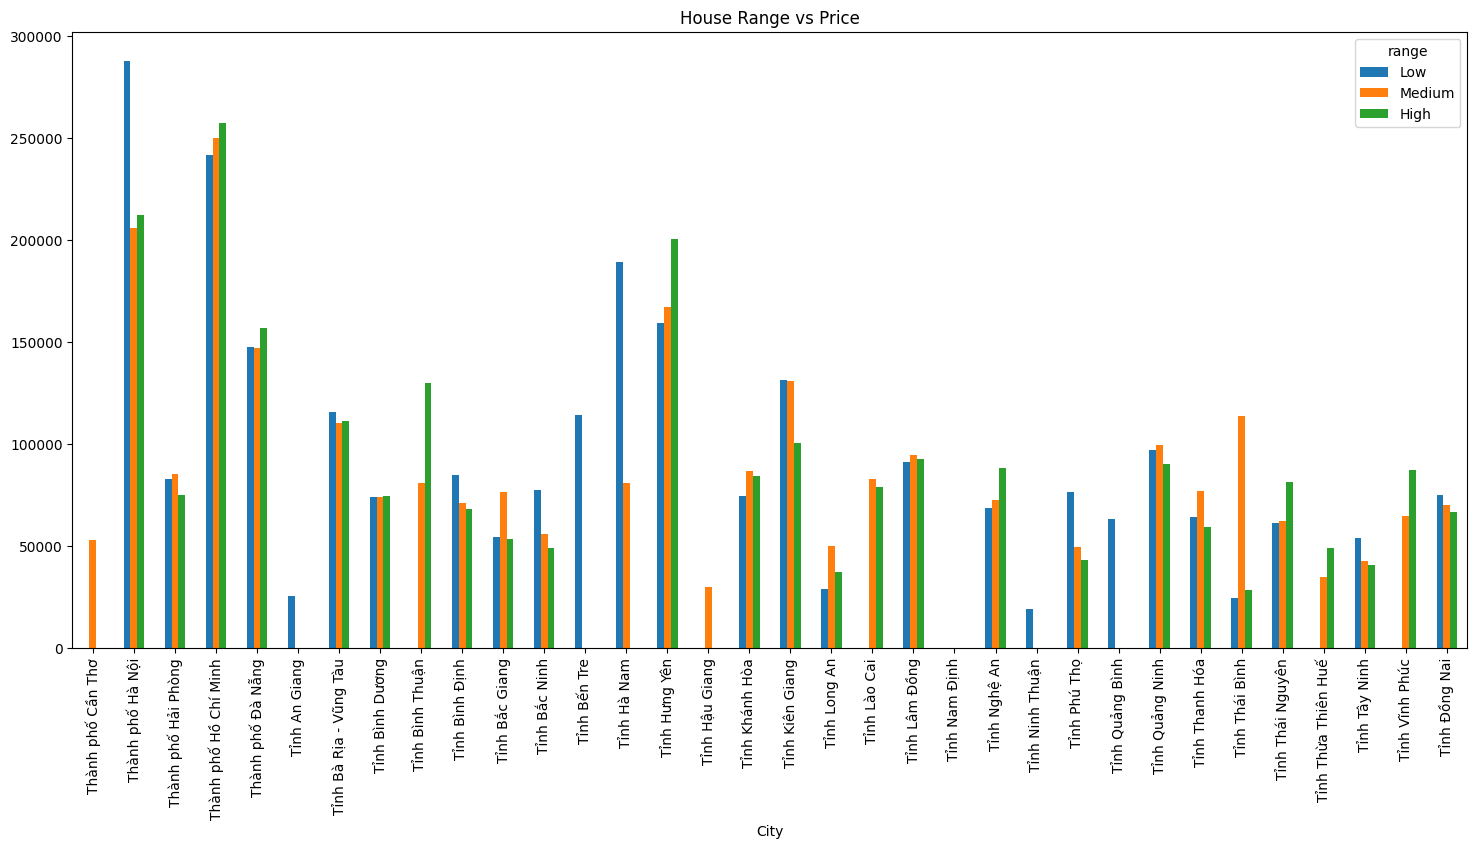

In [16]:
Analyst('City')

##### Hà Nội có giá nhà mức Low nhiều nhất cả nước, trong đó Hồ Chí minh có giá nhà ở mức High nhiều nhất cả nước 
##### Đã Nẵng, Hưng Yên có giá nhà ở các mức Low, Medium, High top 3 top 4 nước

<Figure size 1800x800 with 0 Axes>

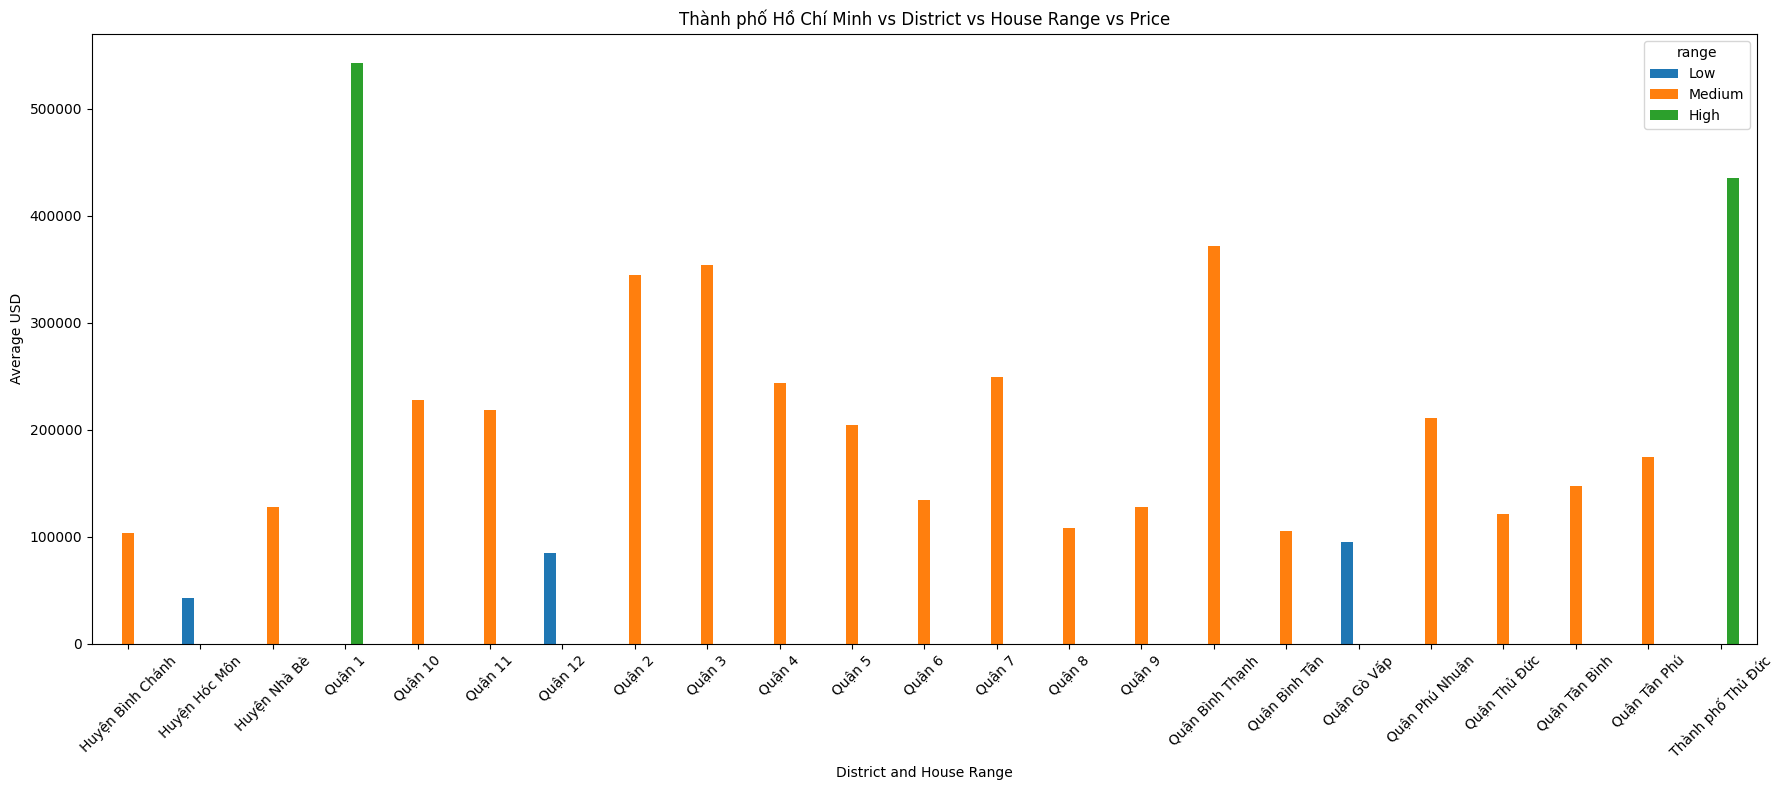

<Figure size 1800x800 with 0 Axes>

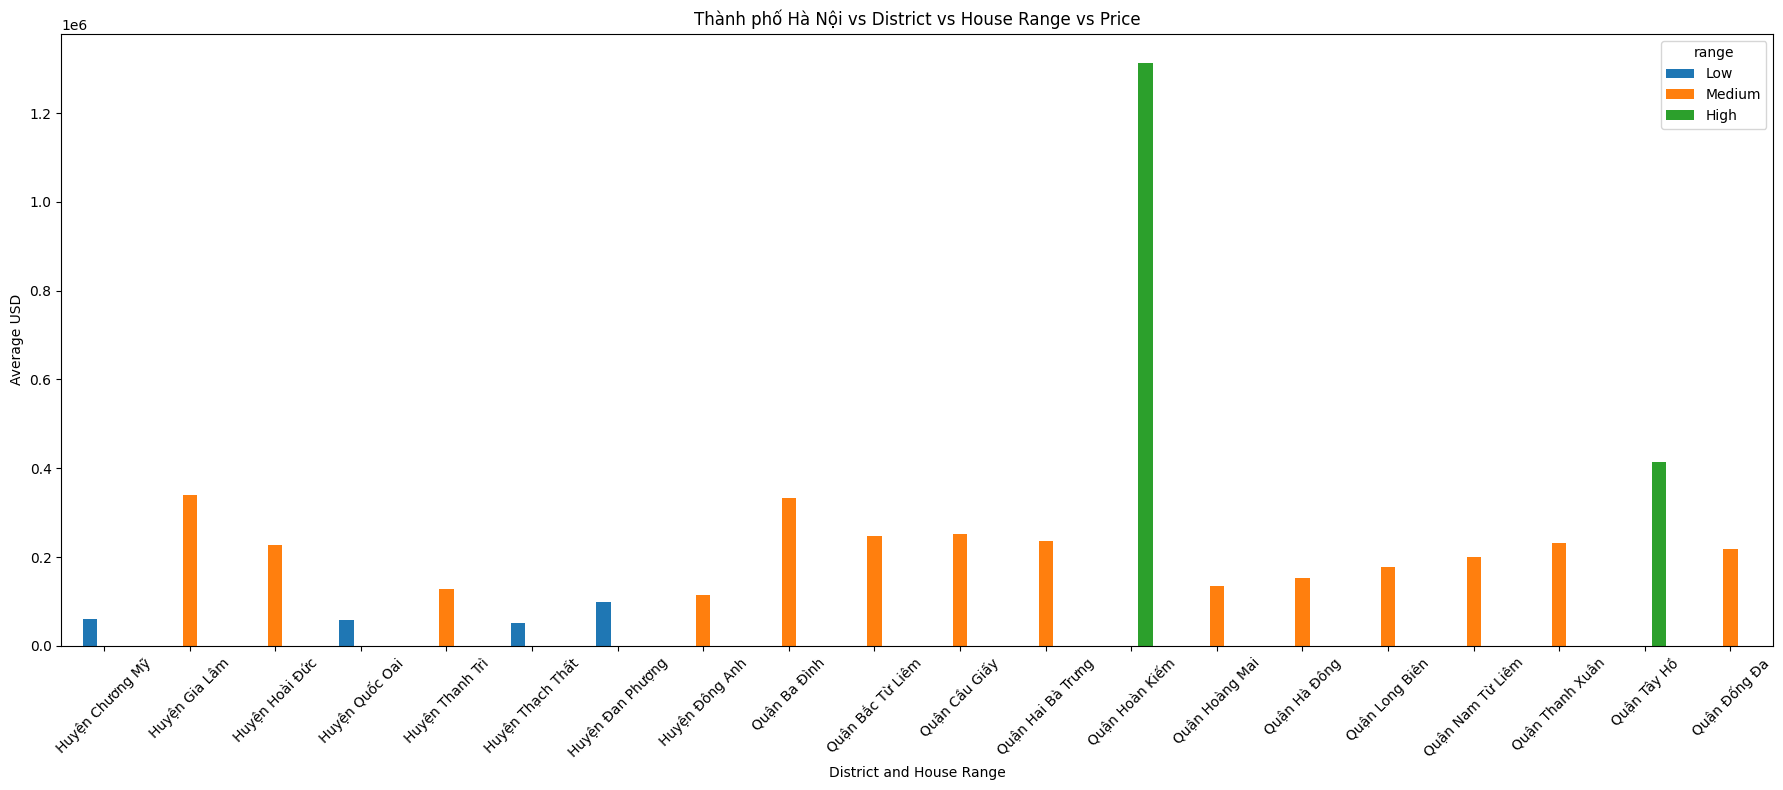

<Figure size 1800x800 with 0 Axes>

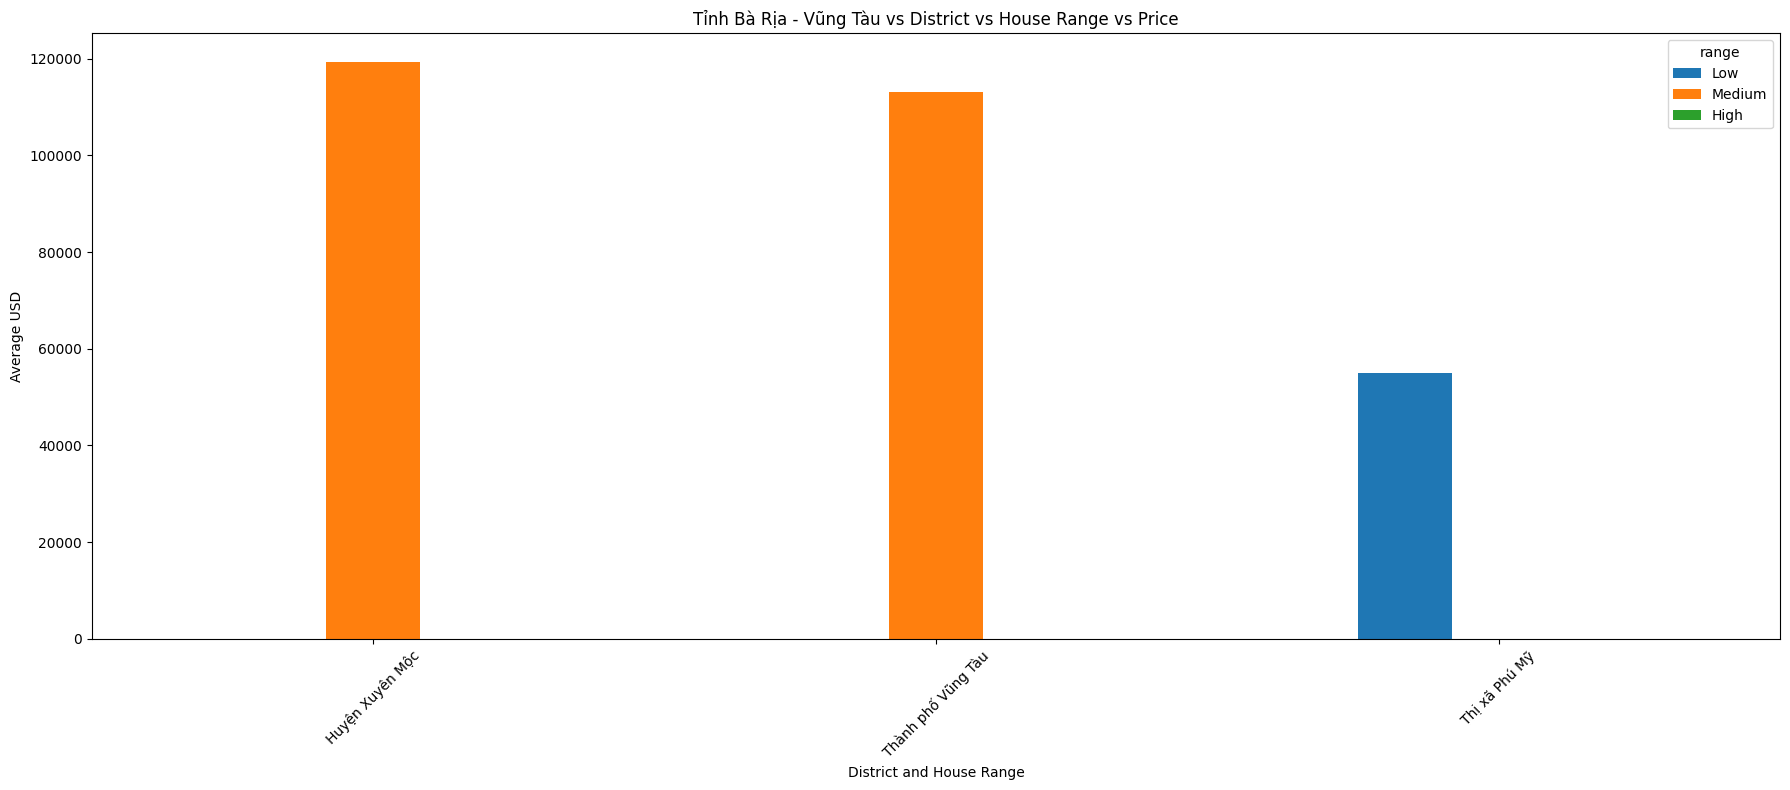

<Figure size 1800x800 with 0 Axes>

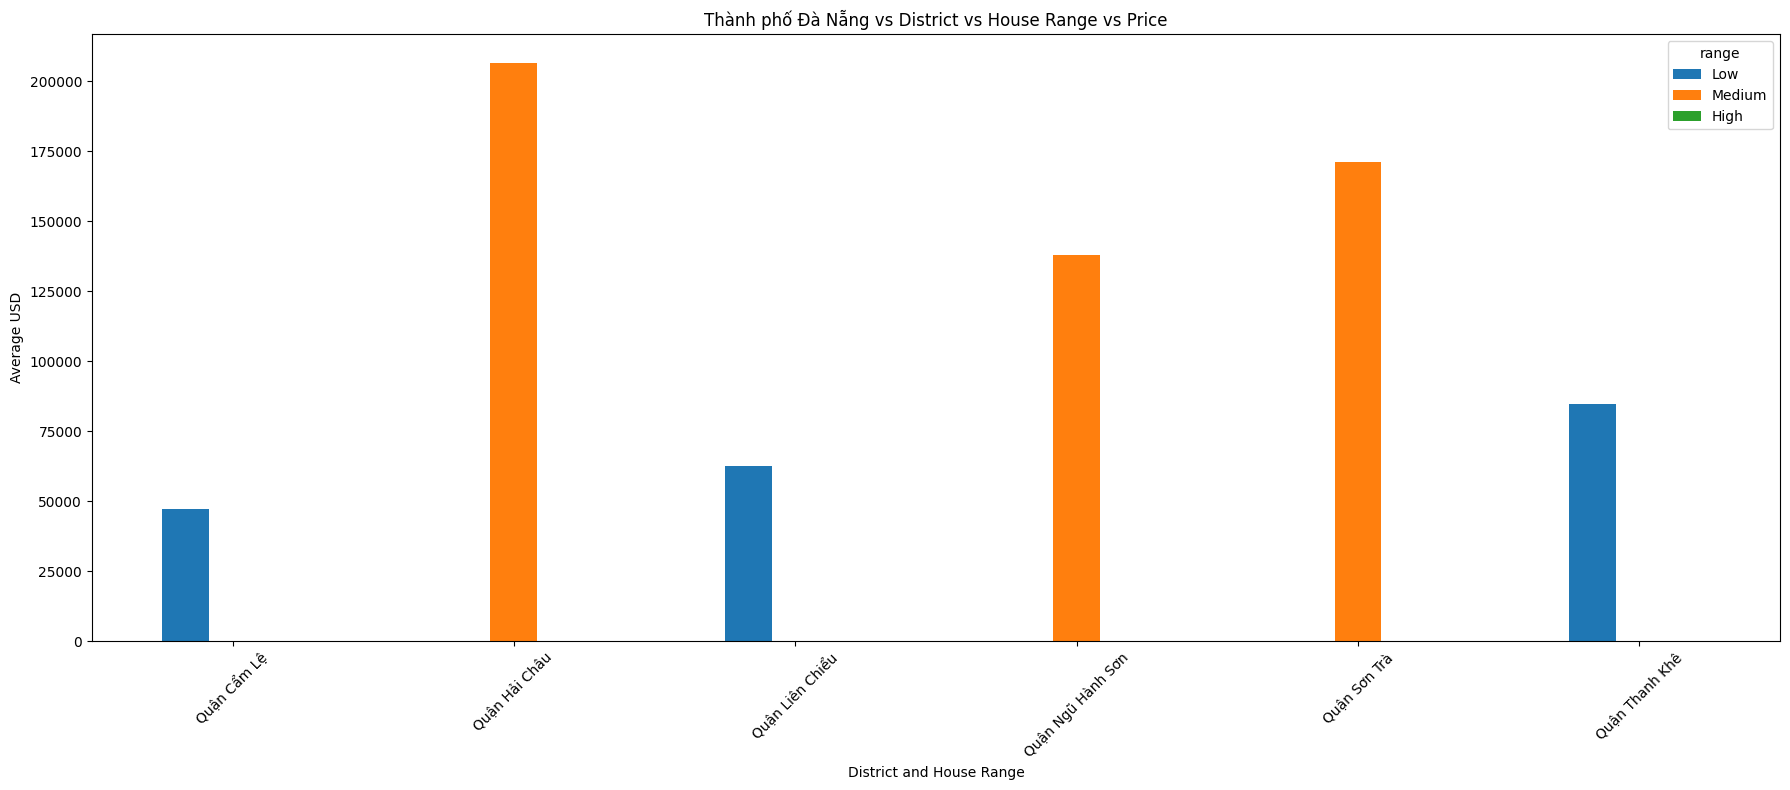

<Figure size 1800x800 with 0 Axes>

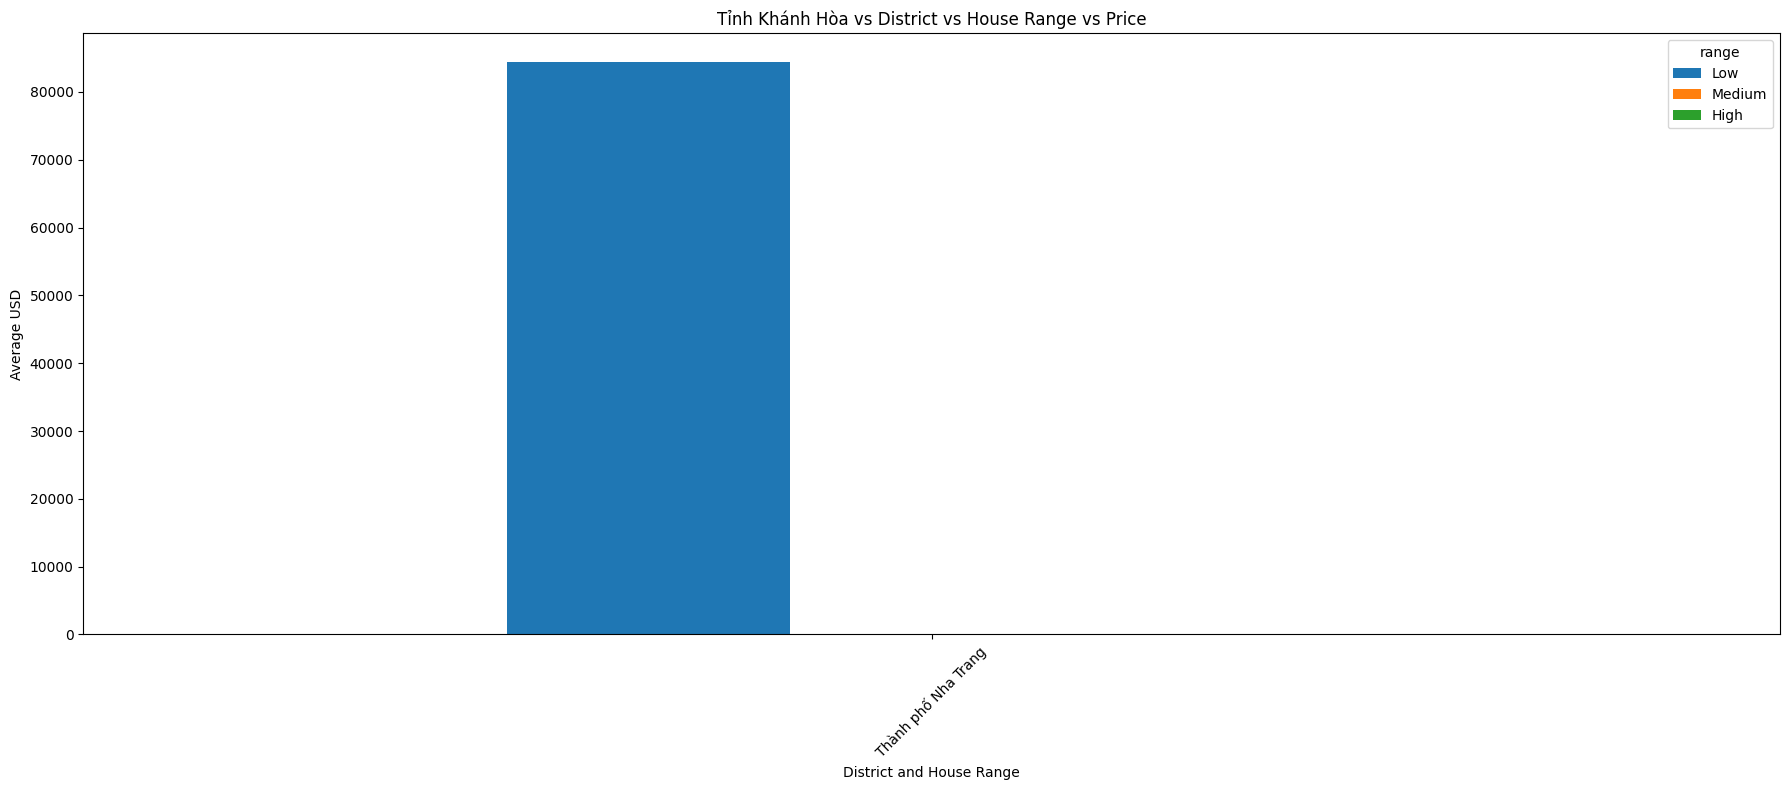

<Figure size 1800x800 with 0 Axes>

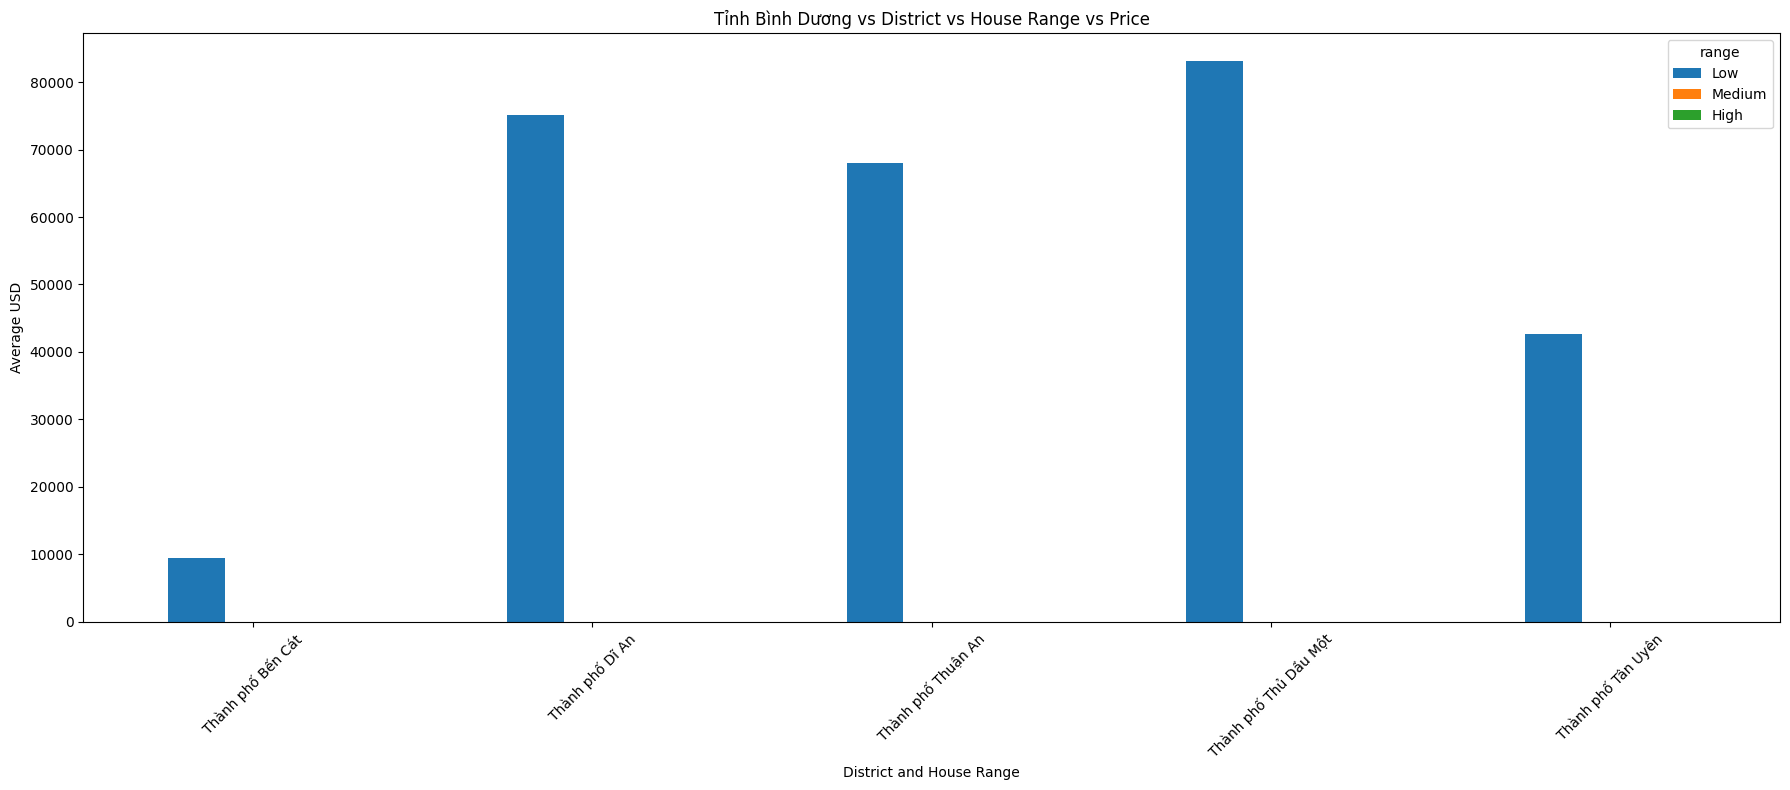

<Figure size 1800x800 with 0 Axes>

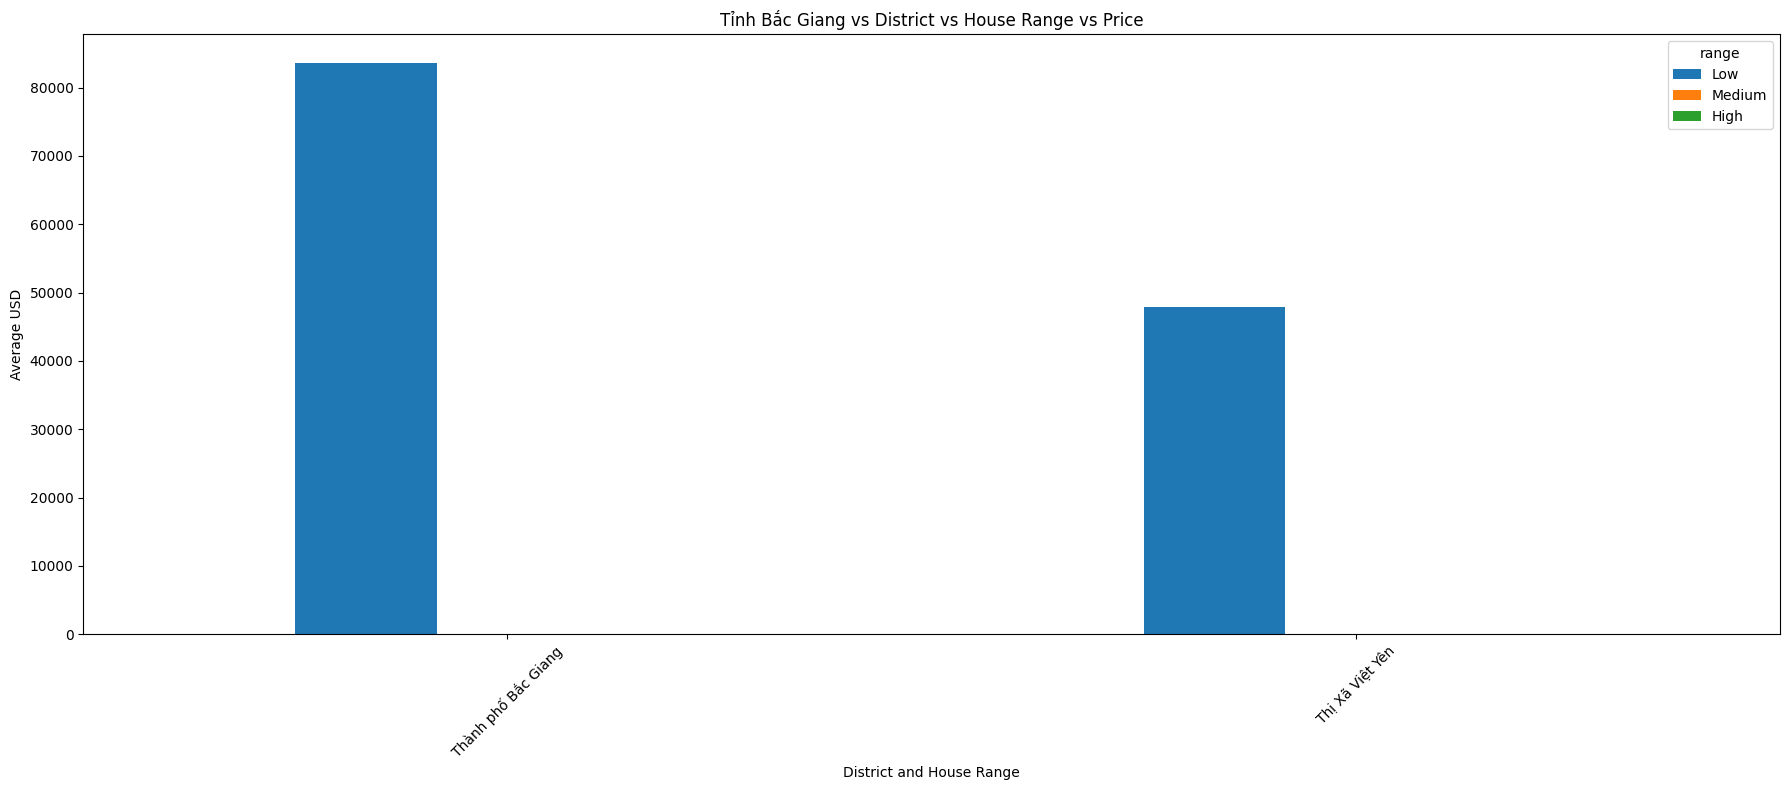

<Figure size 1800x800 with 0 Axes>

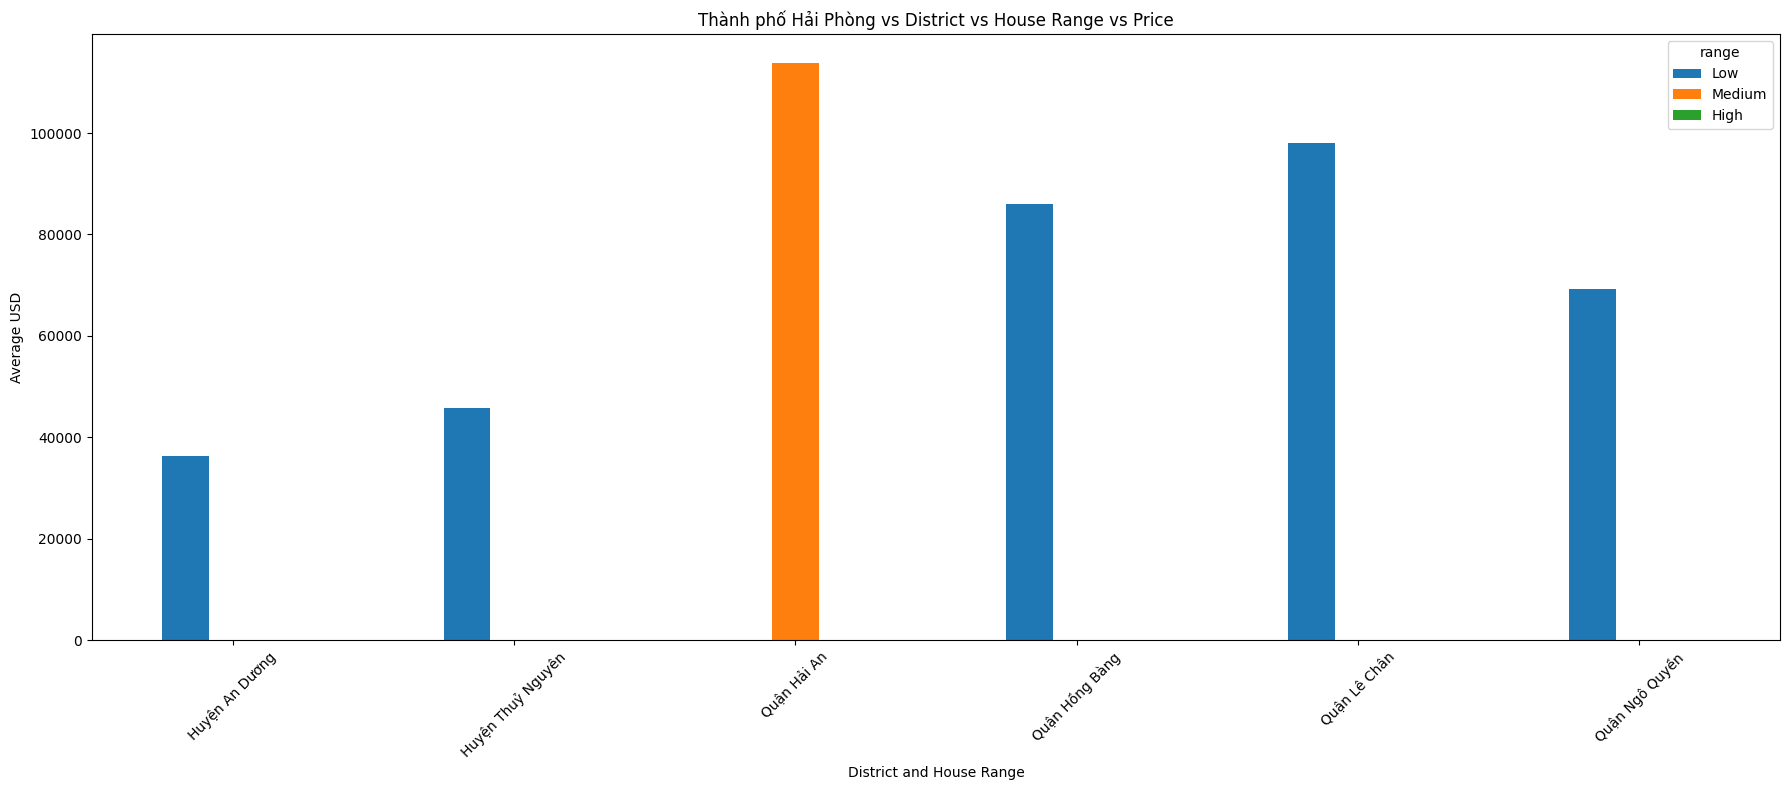

<Figure size 1800x800 with 0 Axes>

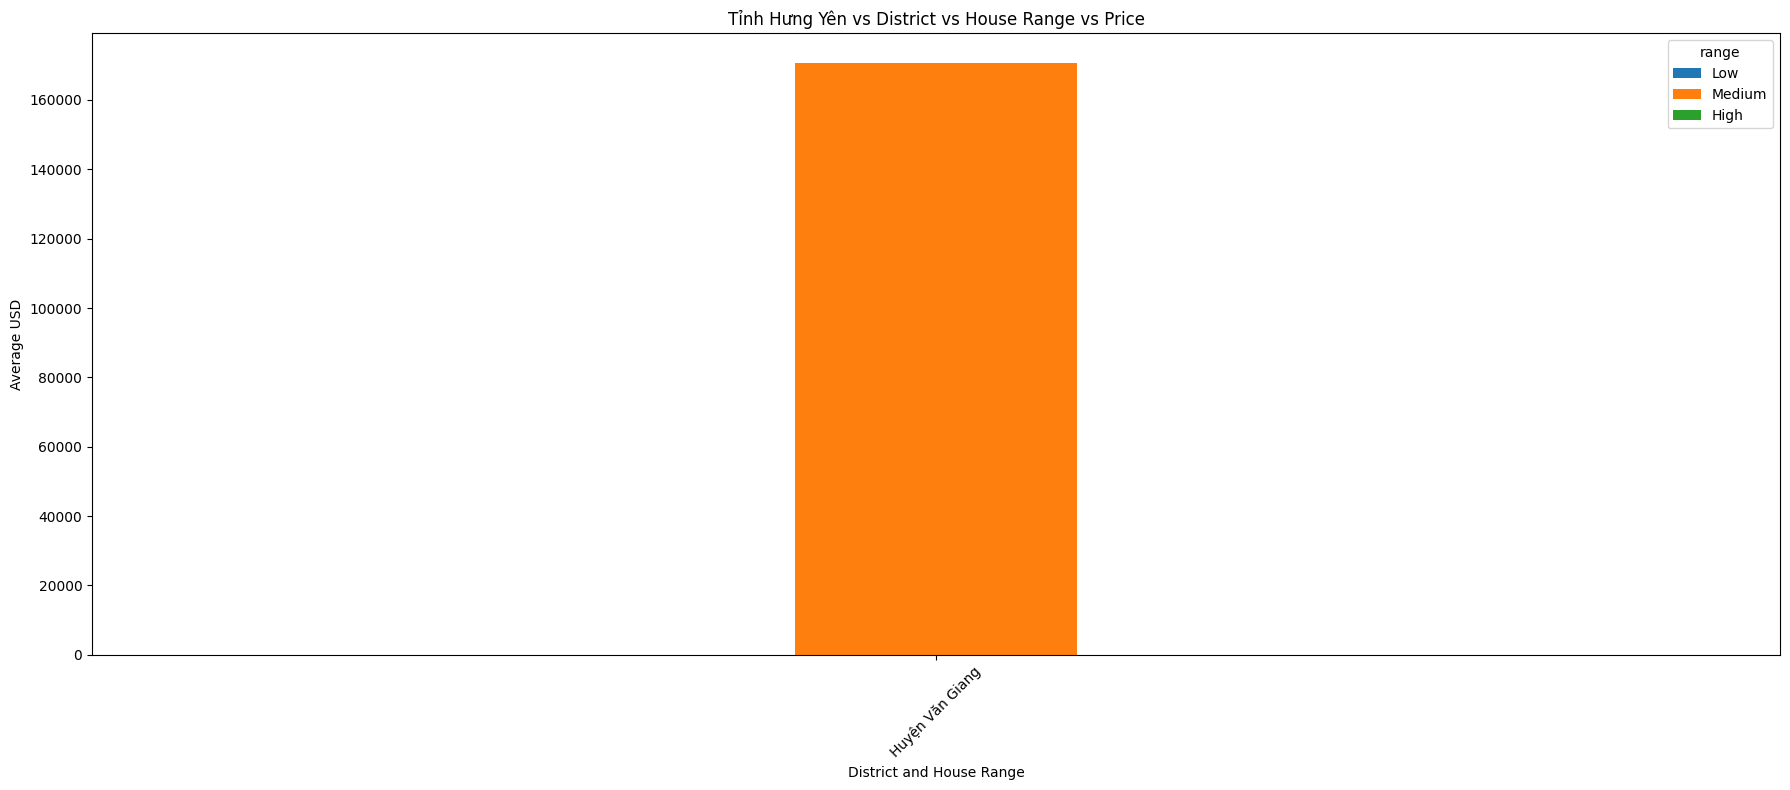

<Figure size 1800x800 with 0 Axes>

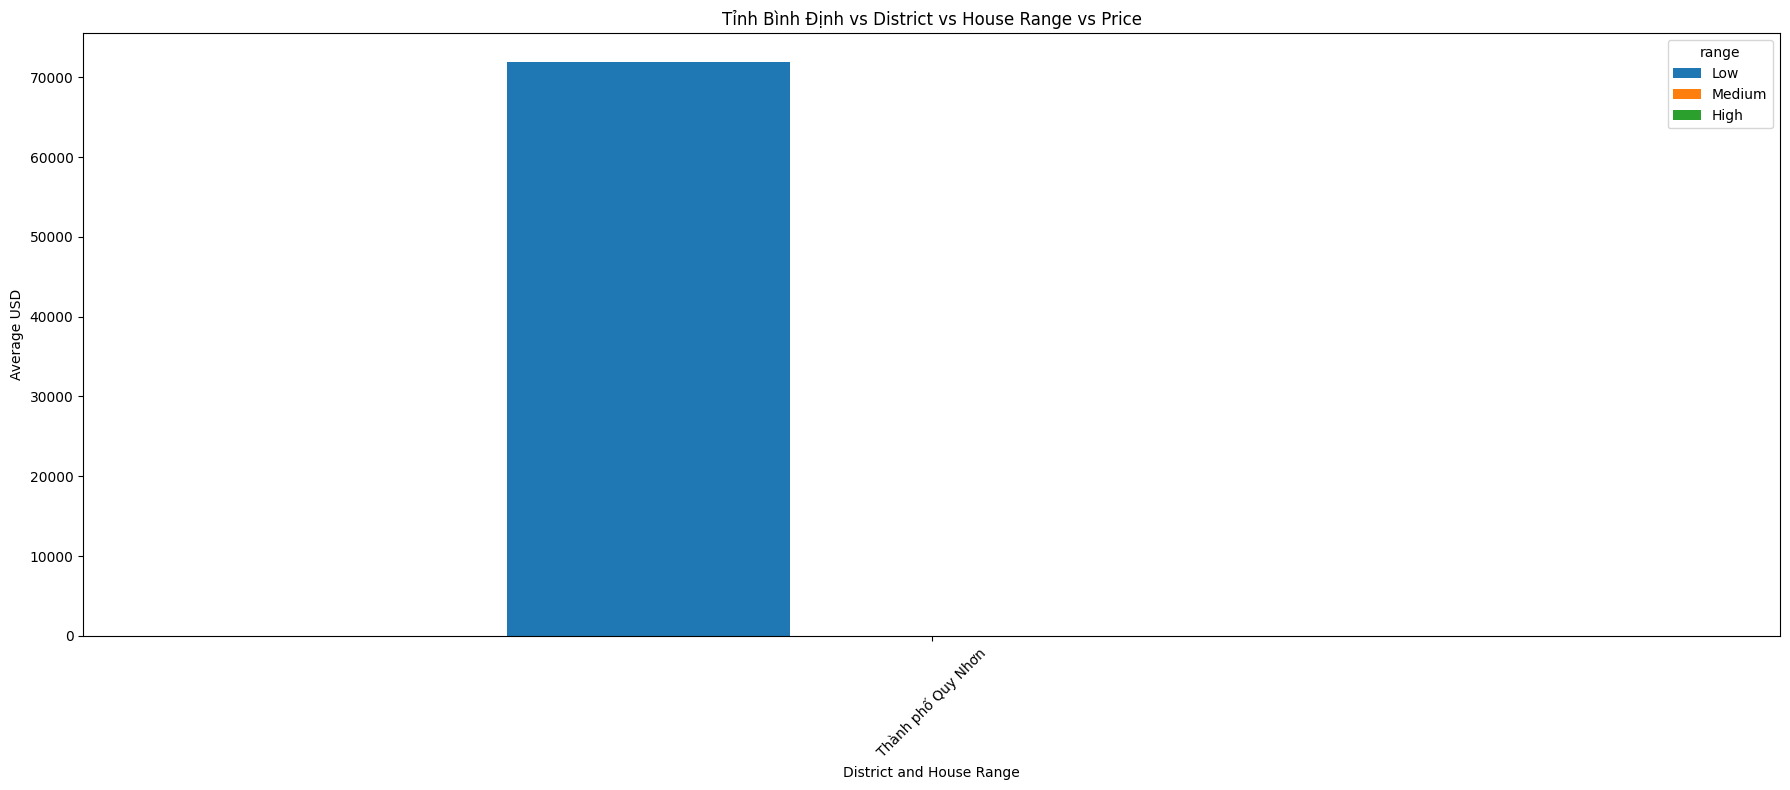

<Figure size 1800x800 with 0 Axes>

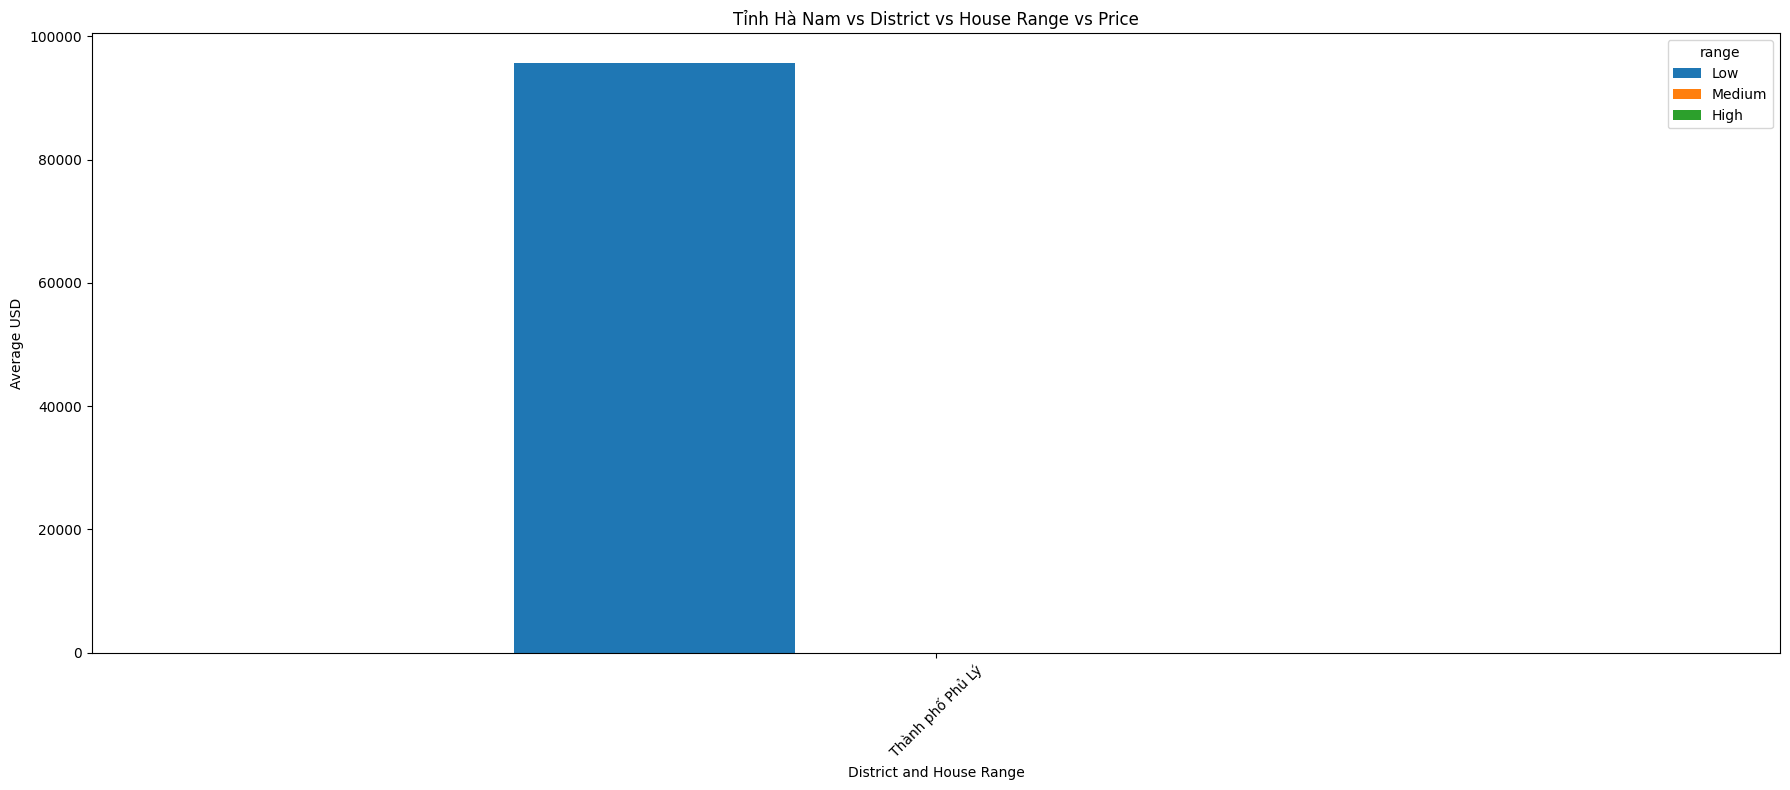

<Figure size 1800x800 with 0 Axes>

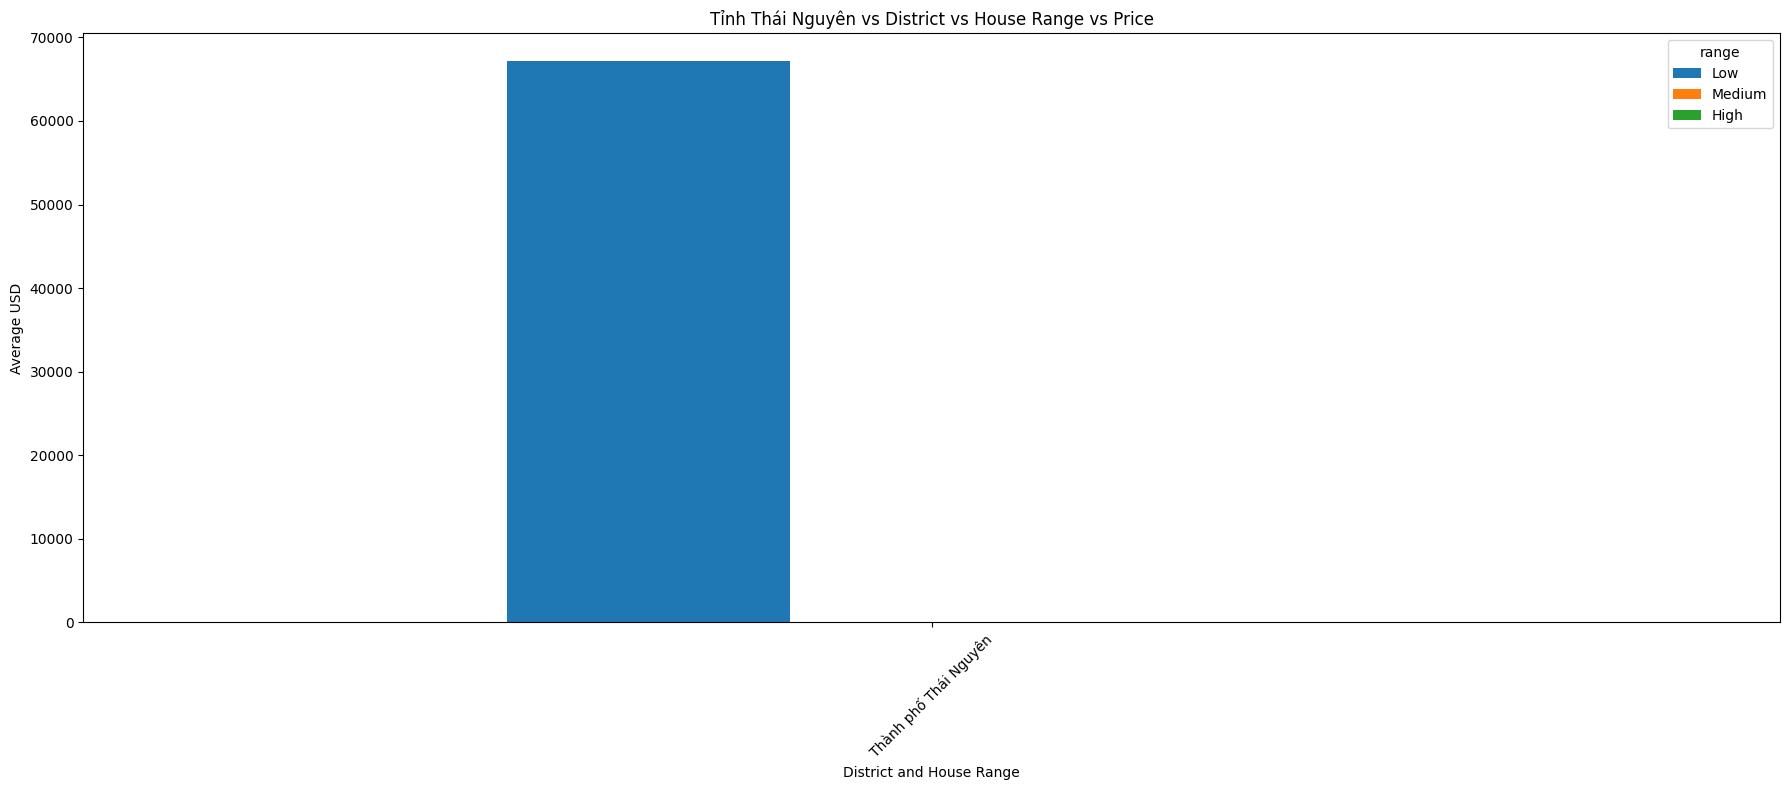

<Figure size 1800x800 with 0 Axes>

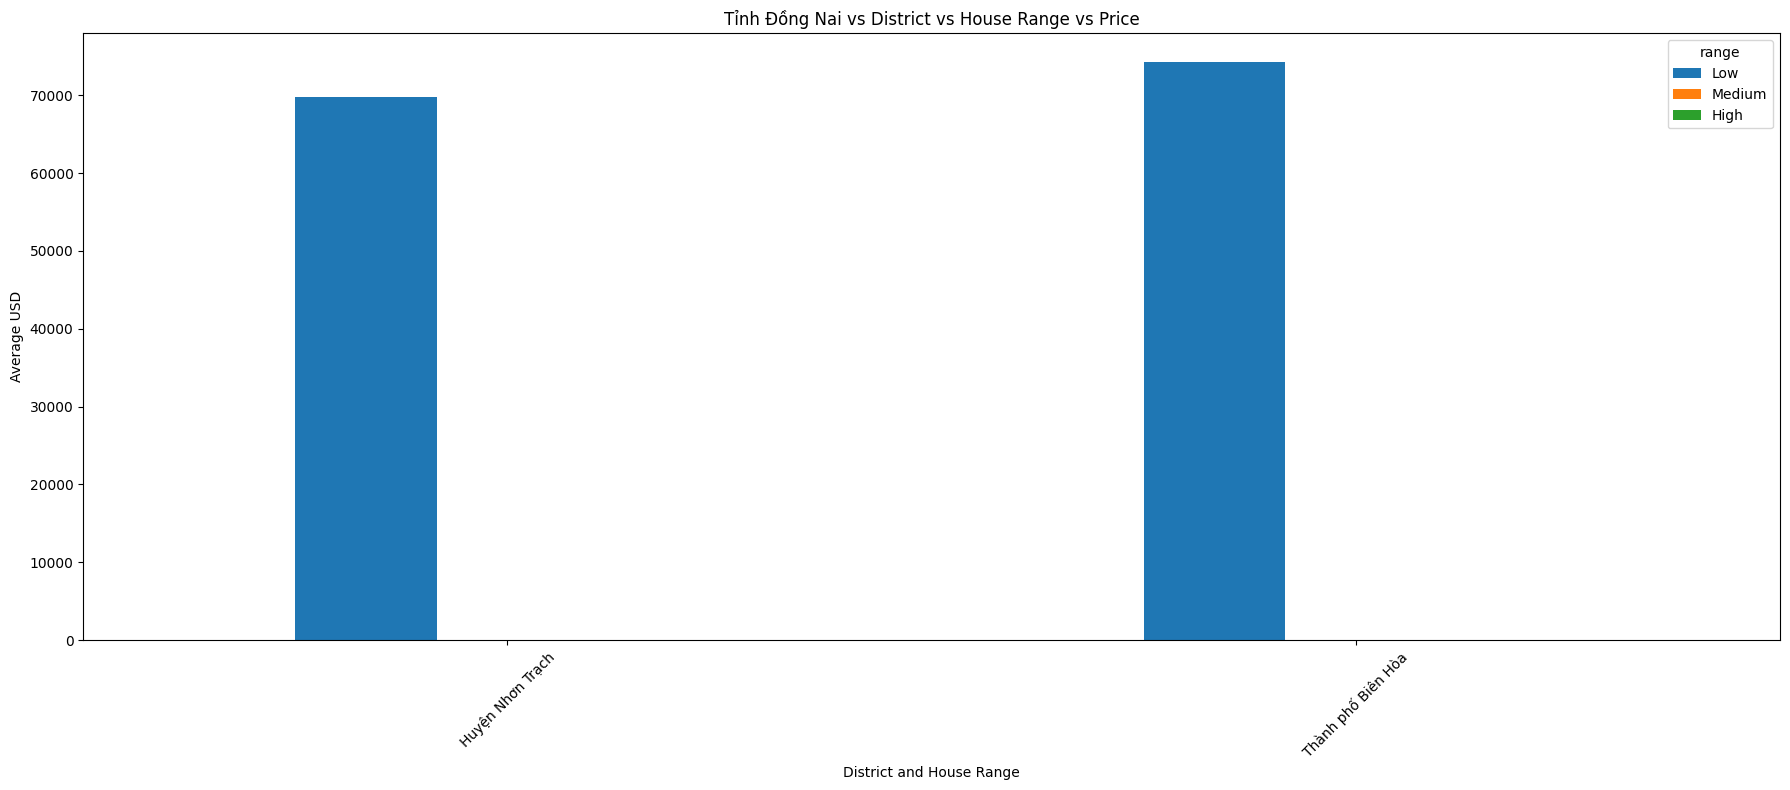

<Figure size 1800x800 with 0 Axes>

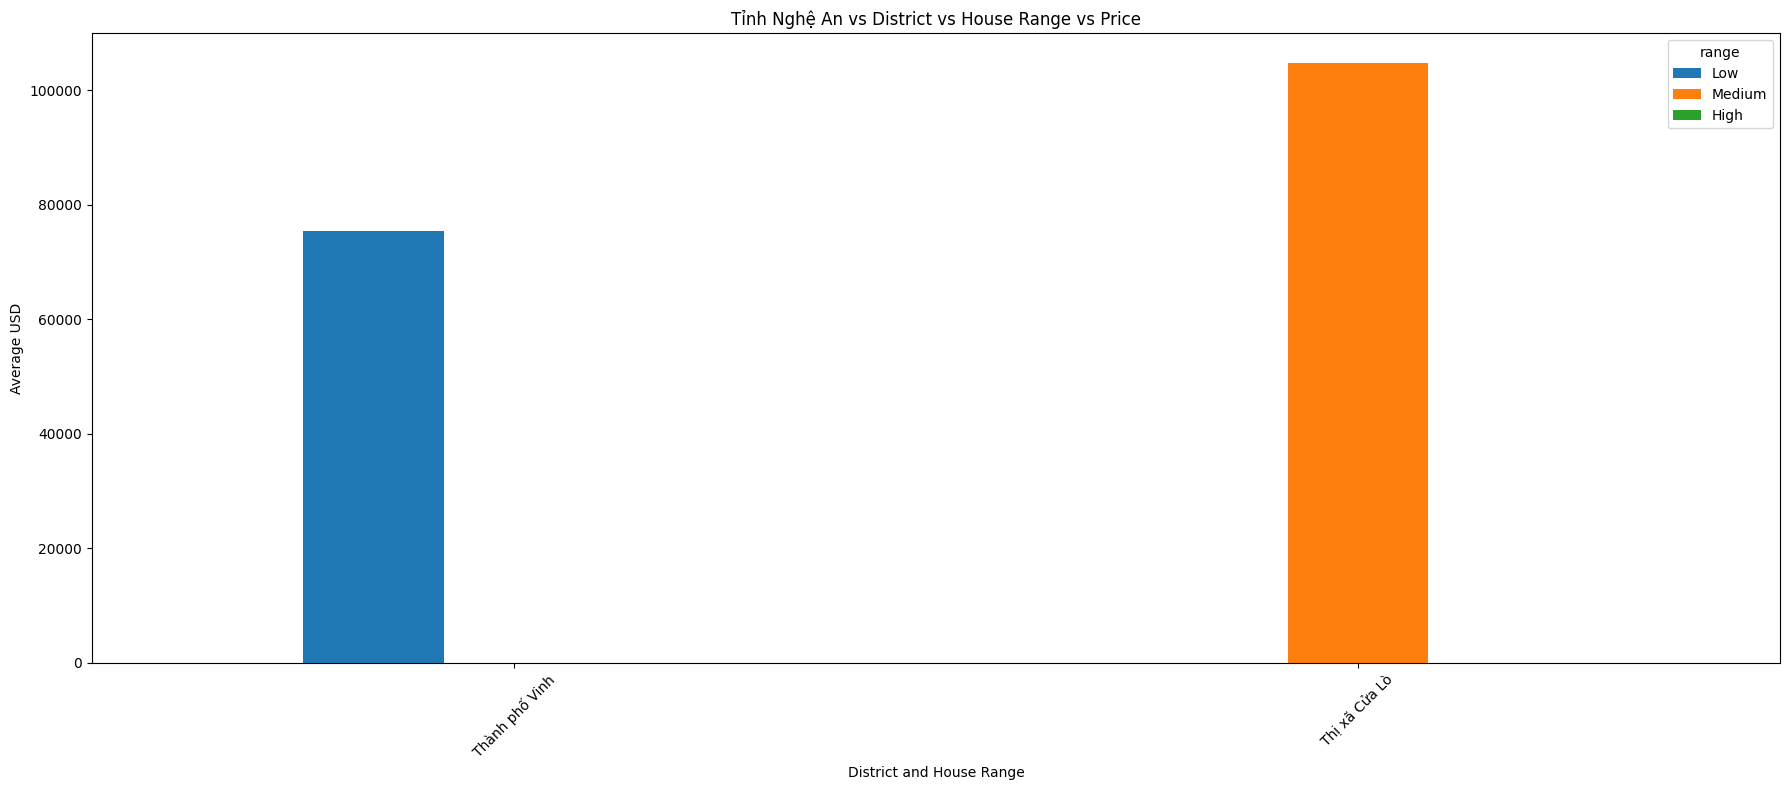

<Figure size 1800x800 with 0 Axes>

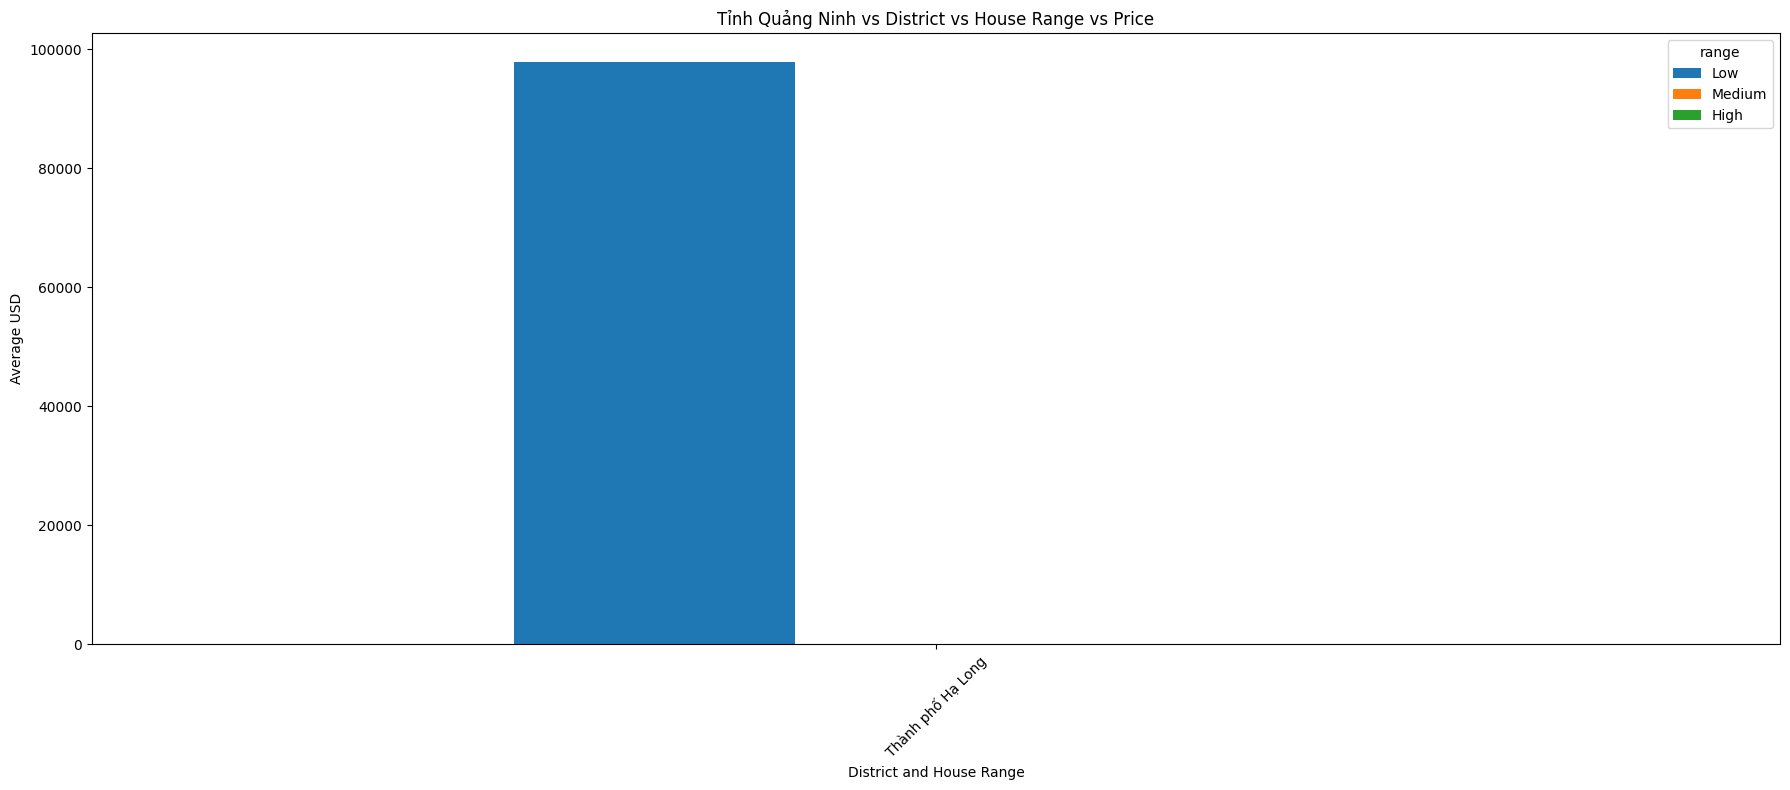

<Figure size 1800x800 with 0 Axes>

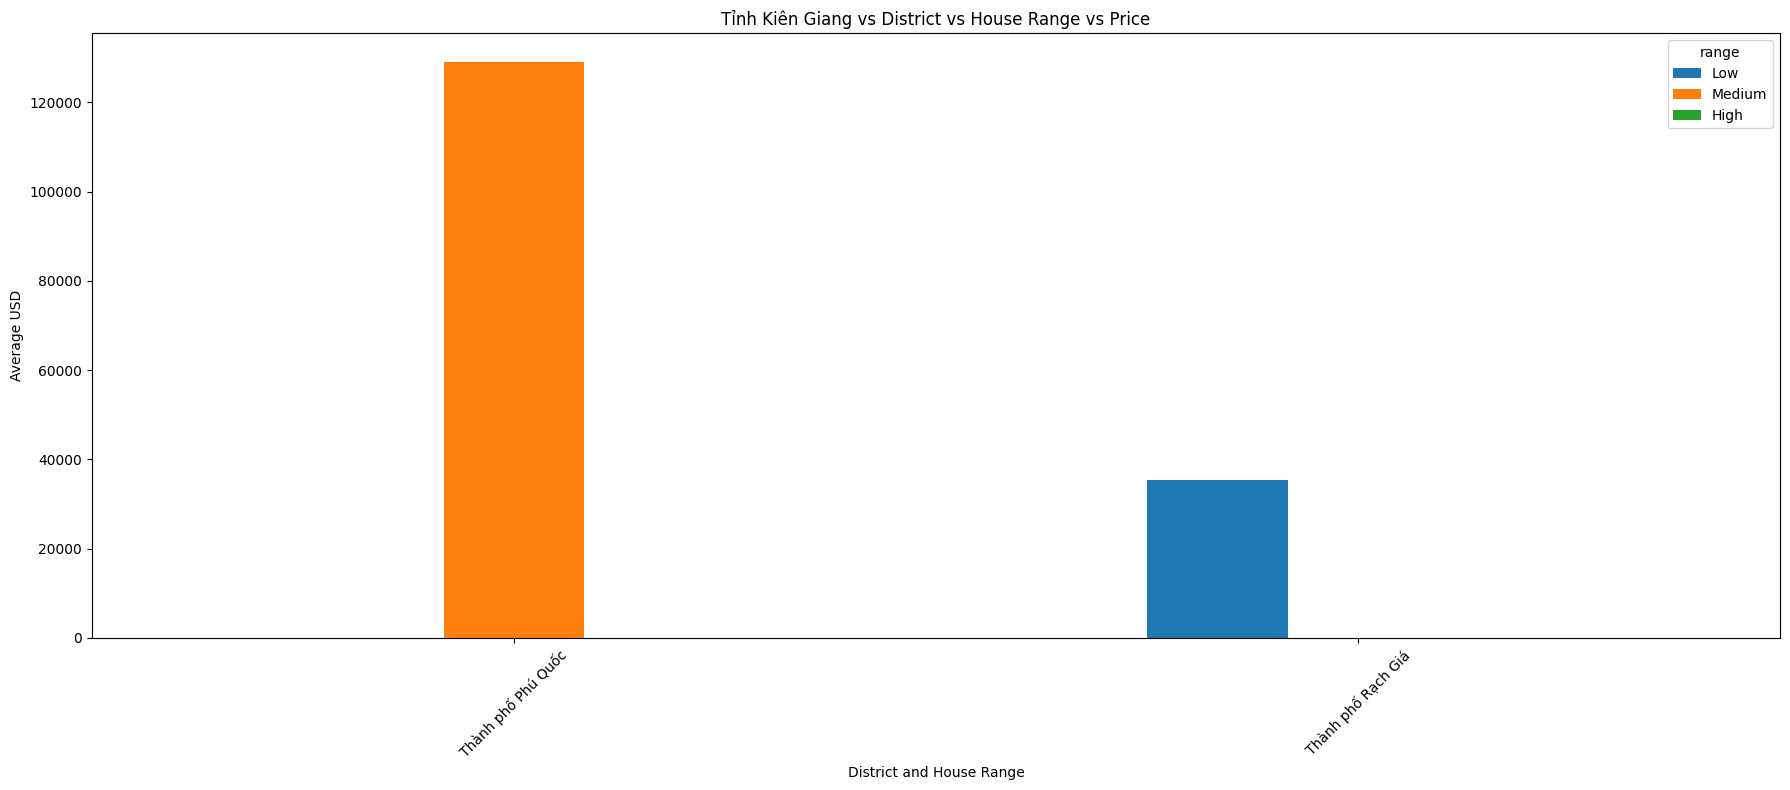

<Figure size 1800x800 with 0 Axes>

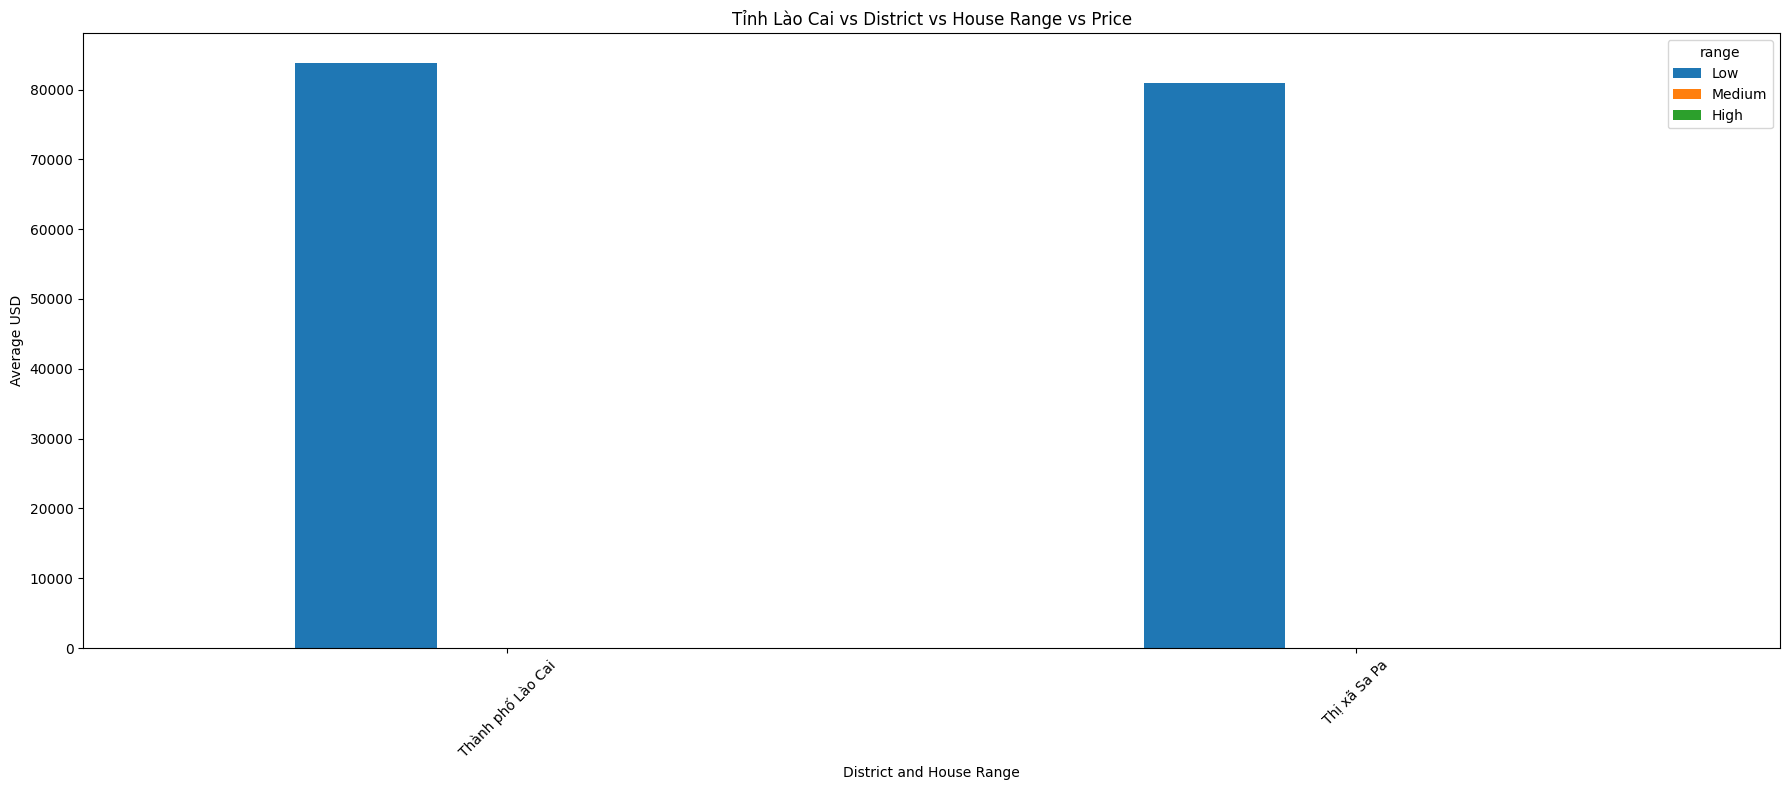

<Figure size 1800x800 with 0 Axes>

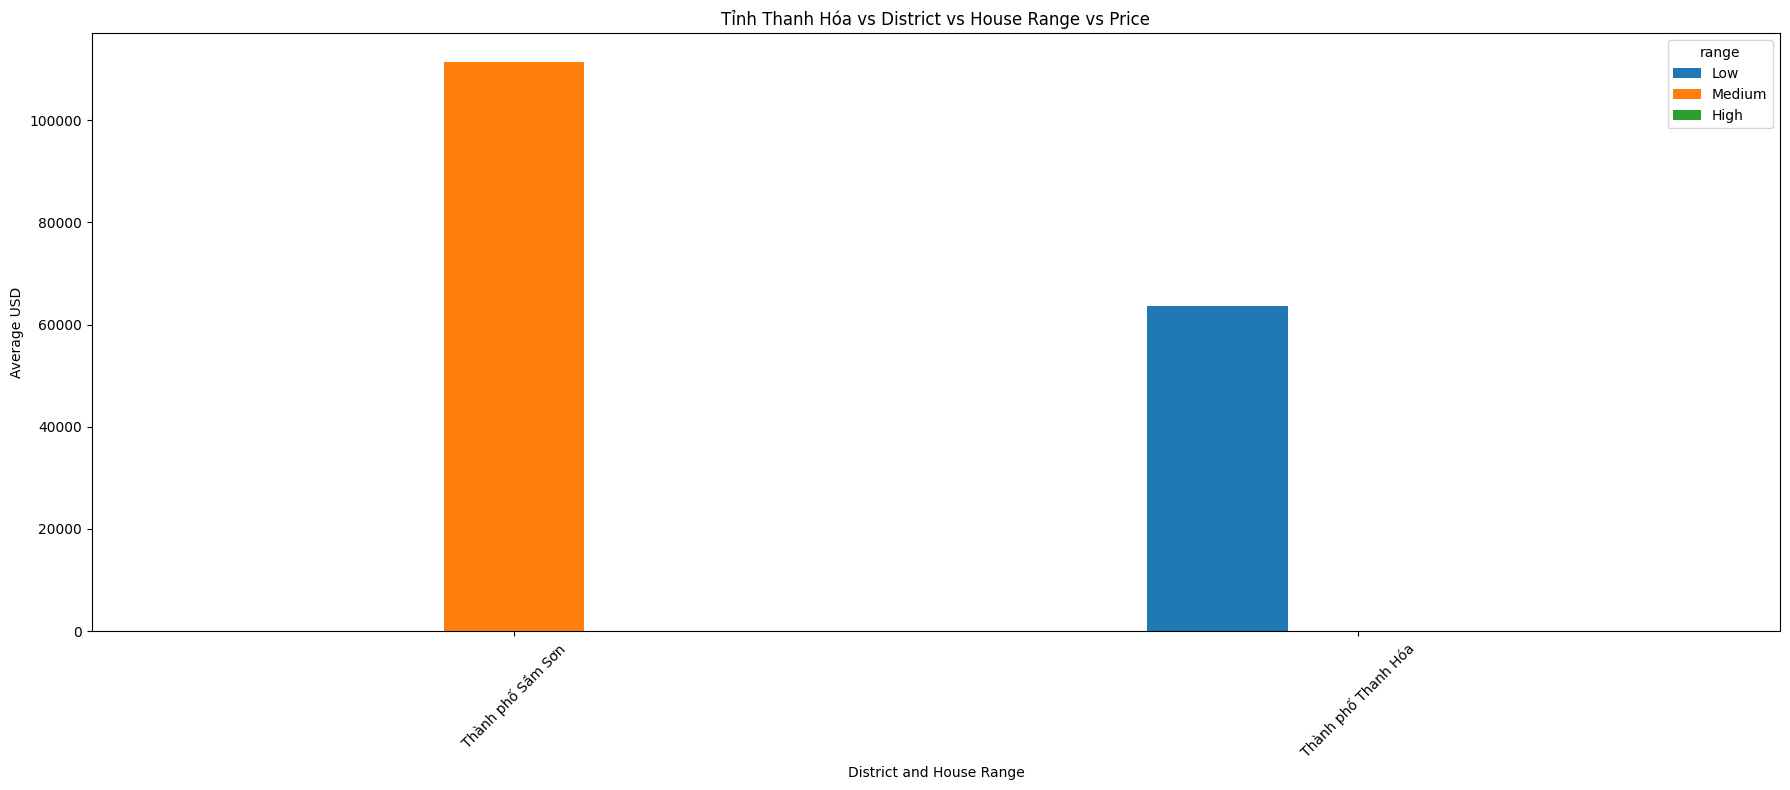

<Figure size 1800x800 with 0 Axes>

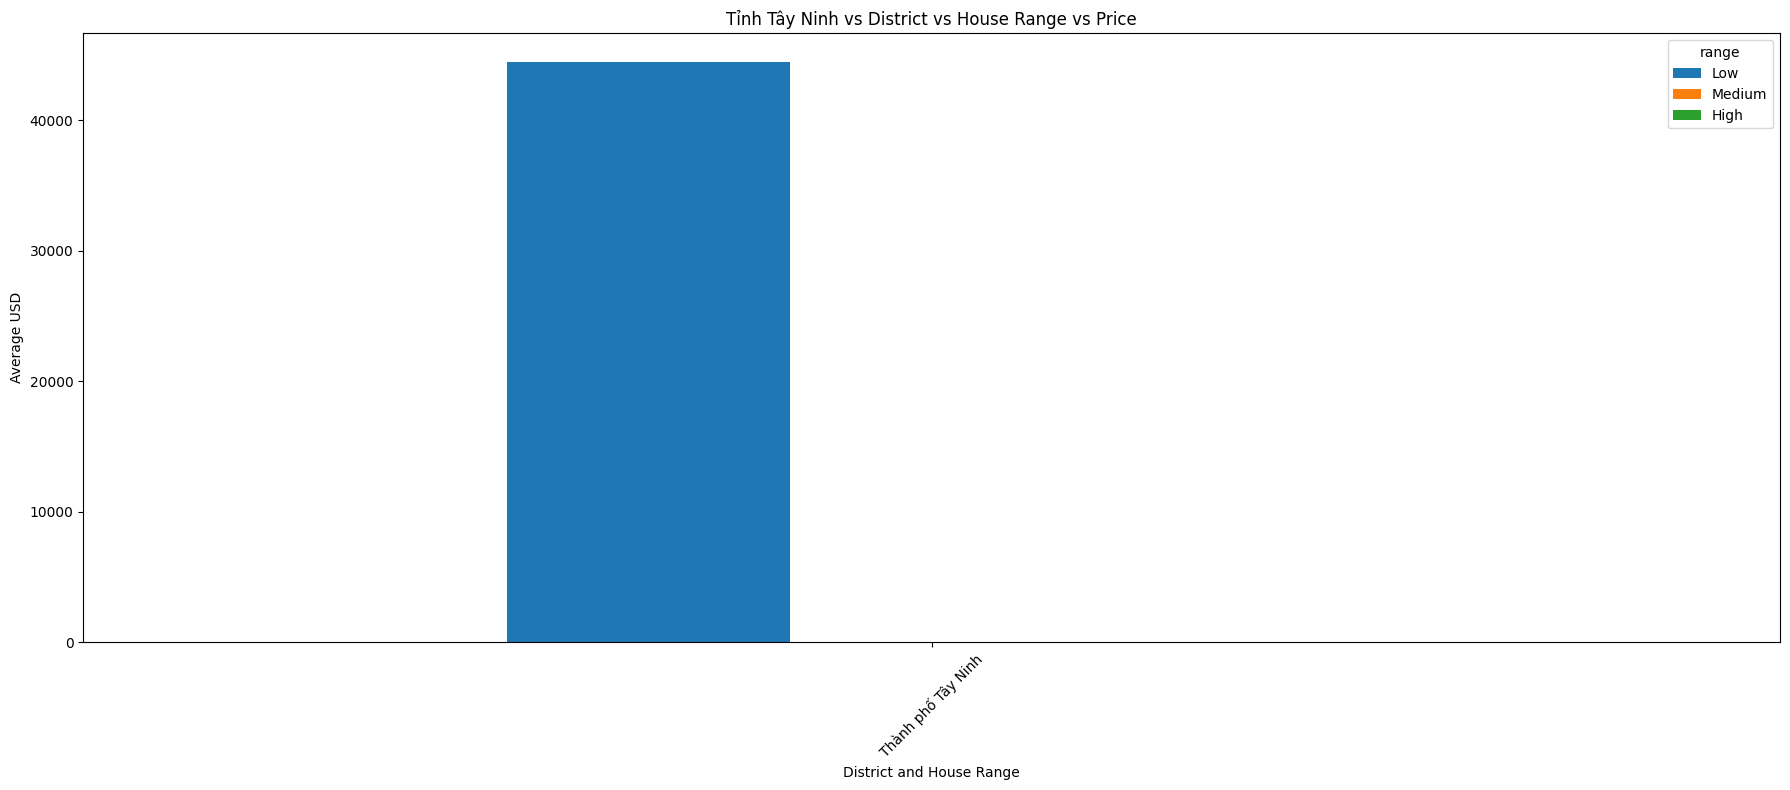

<Figure size 1800x800 with 0 Axes>

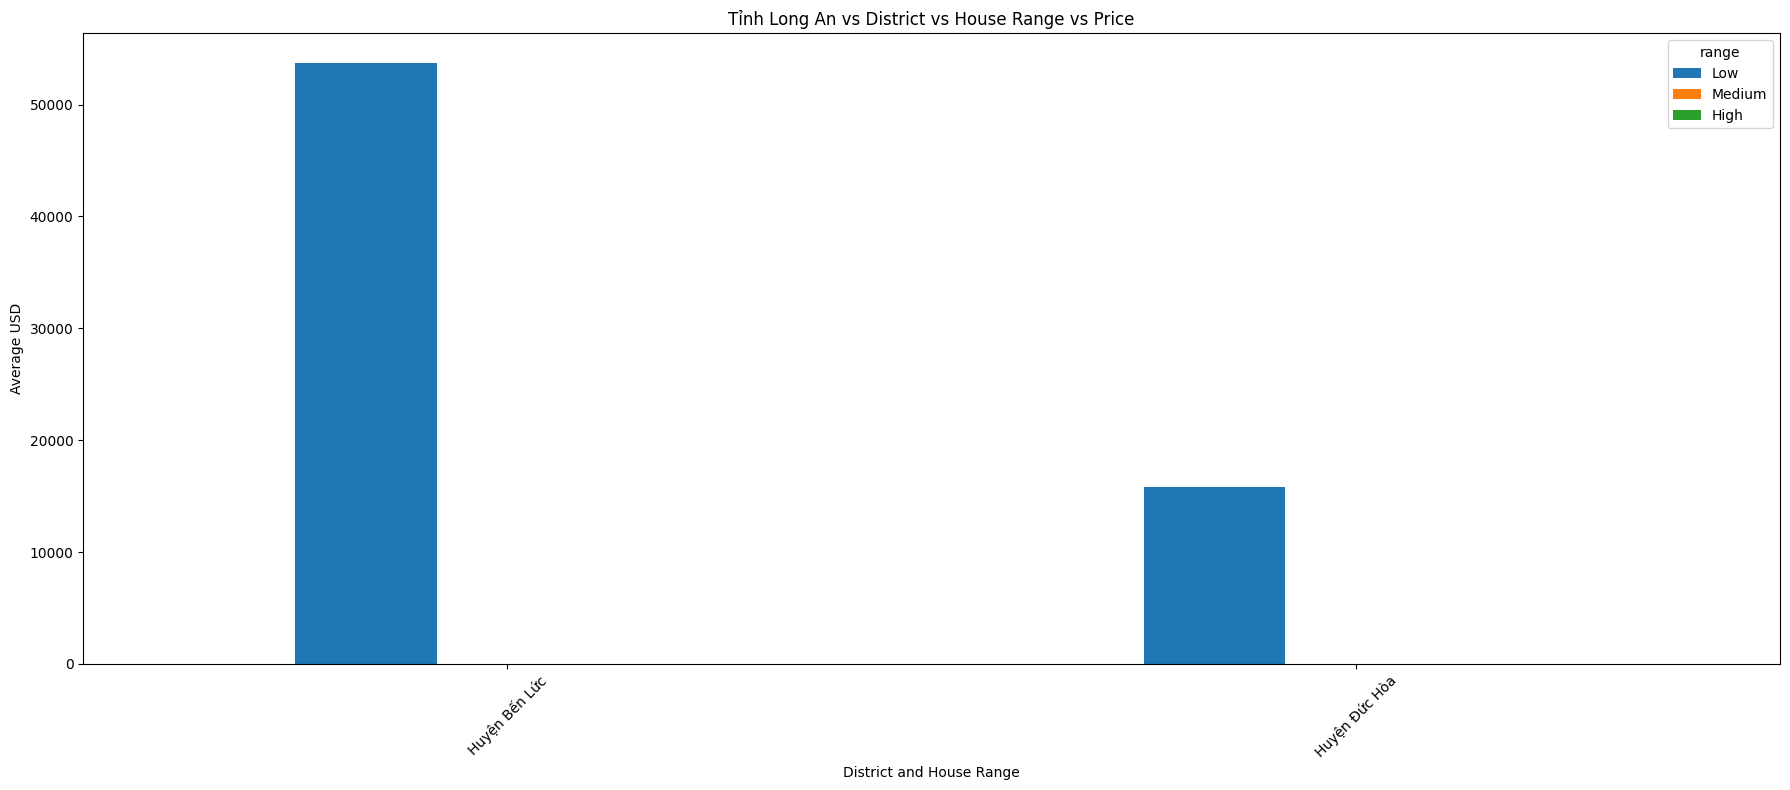

<Figure size 1800x800 with 0 Axes>

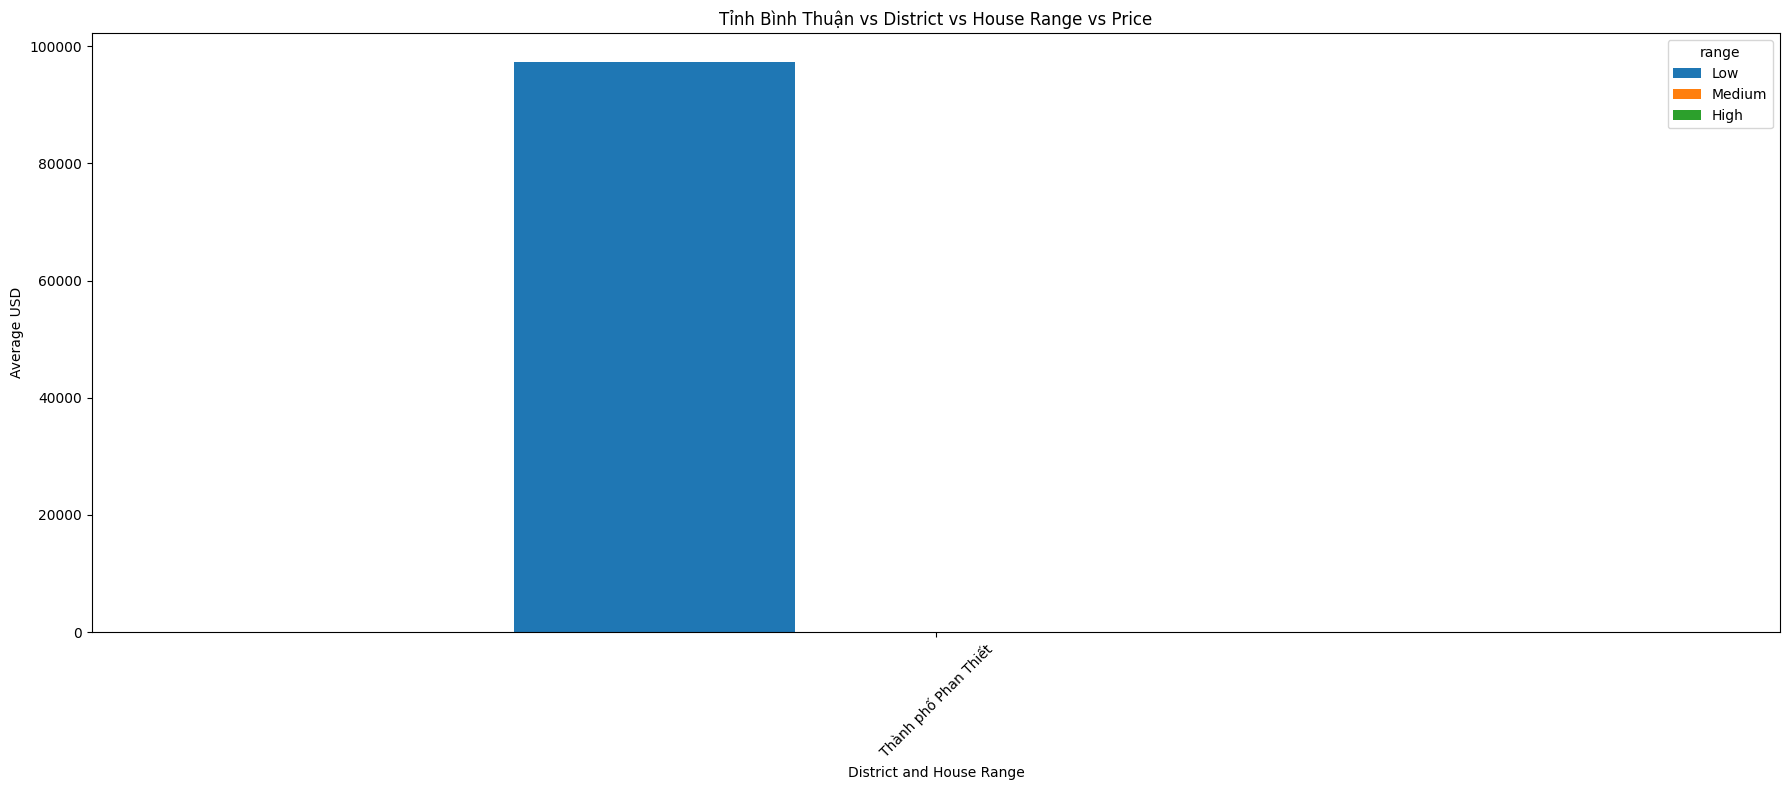

<Figure size 1800x800 with 0 Axes>

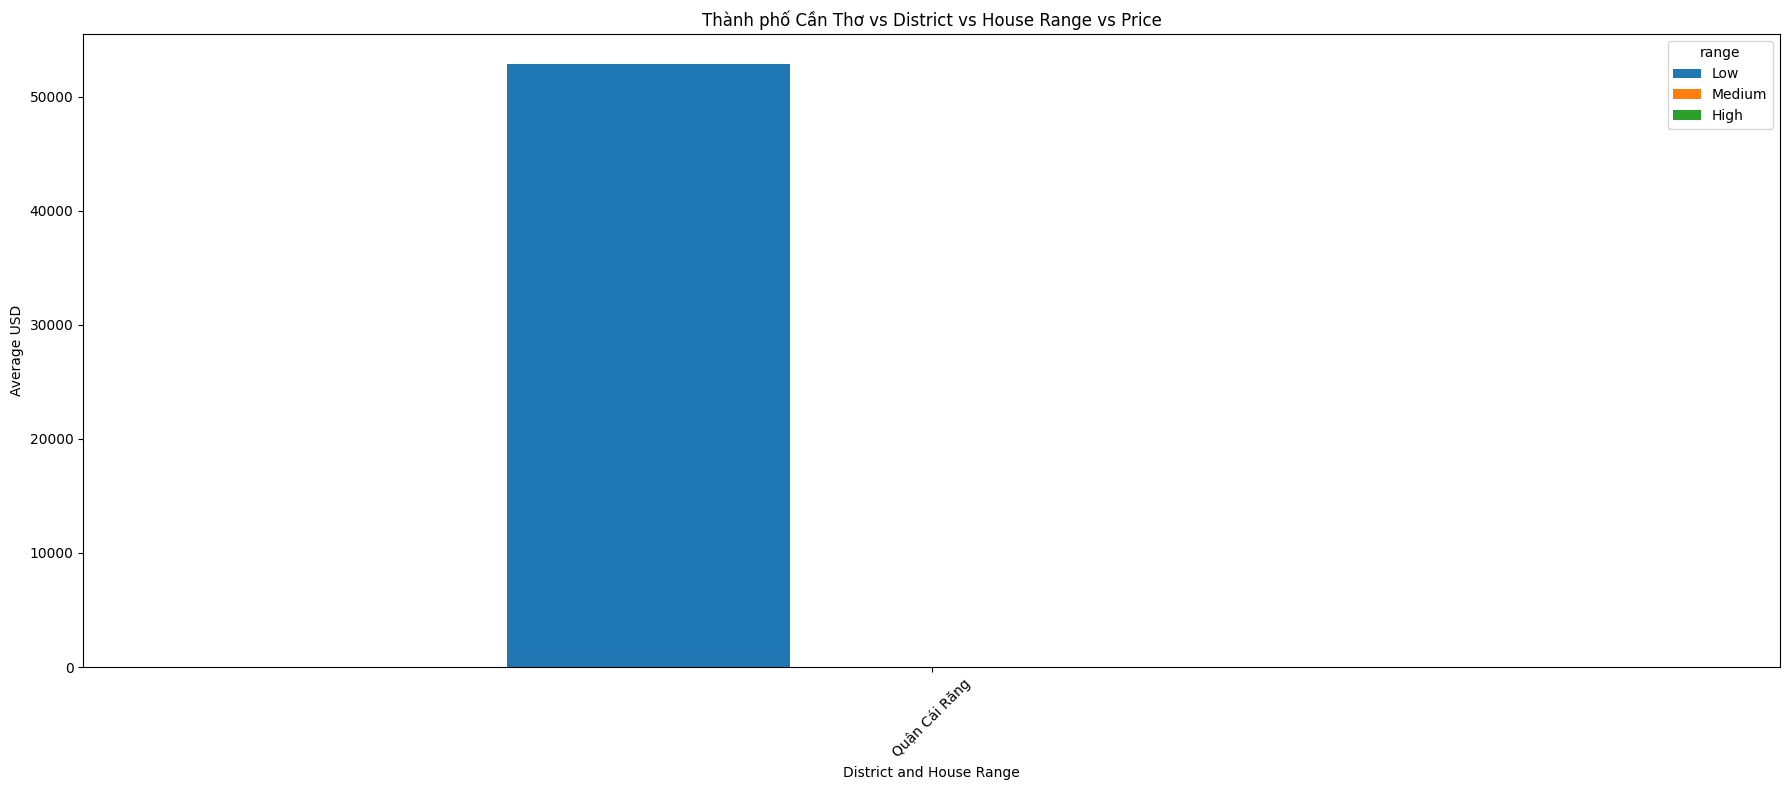

<Figure size 1800x800 with 0 Axes>

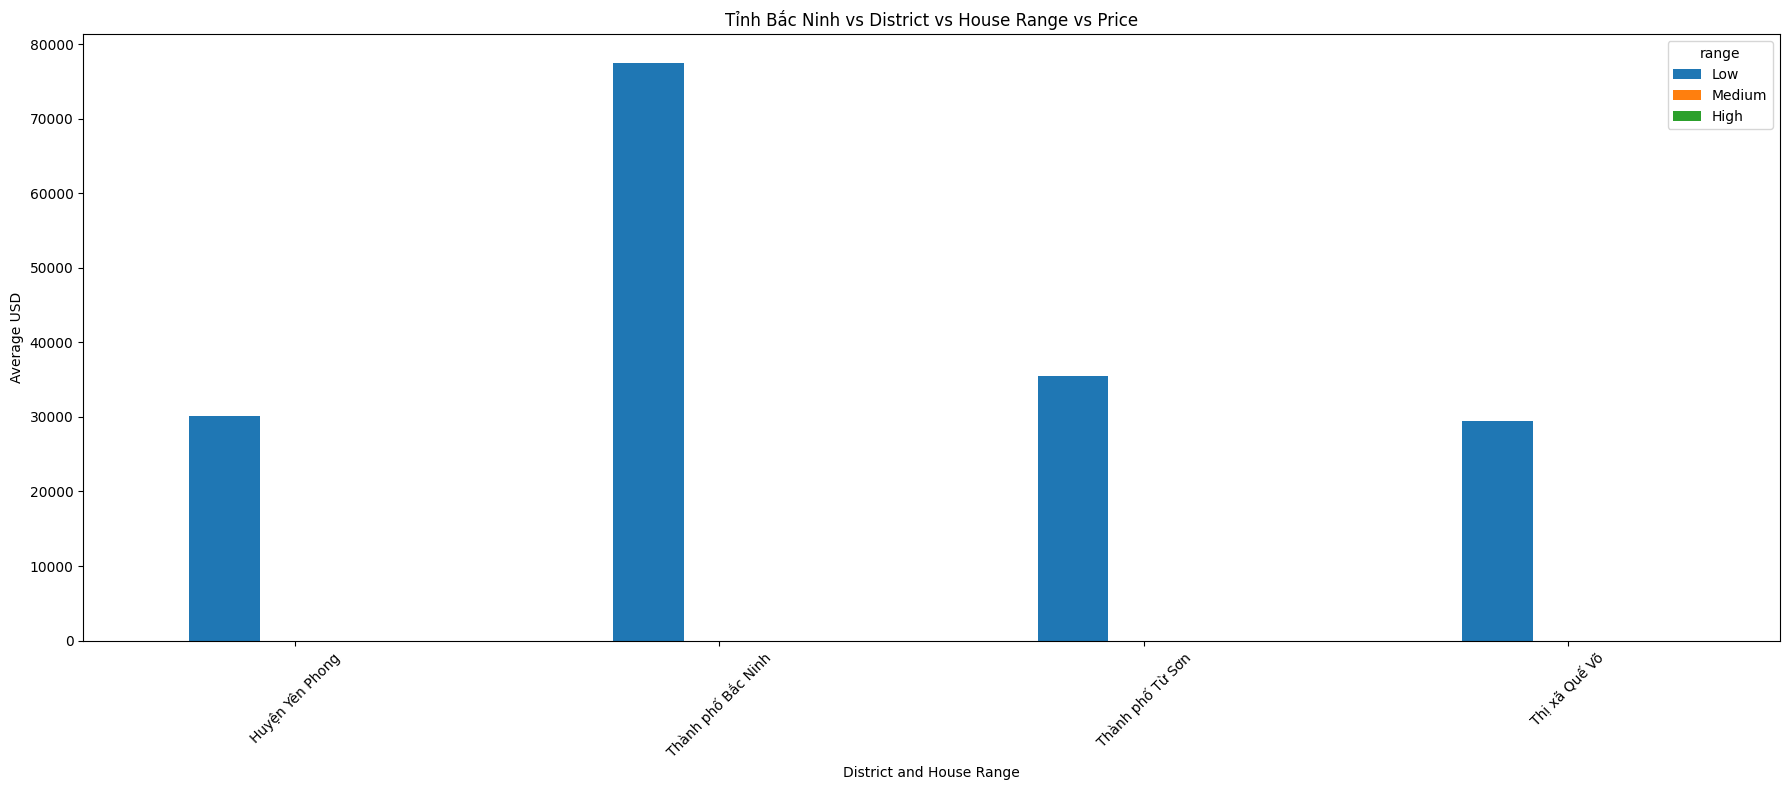

<Figure size 1800x800 with 0 Axes>

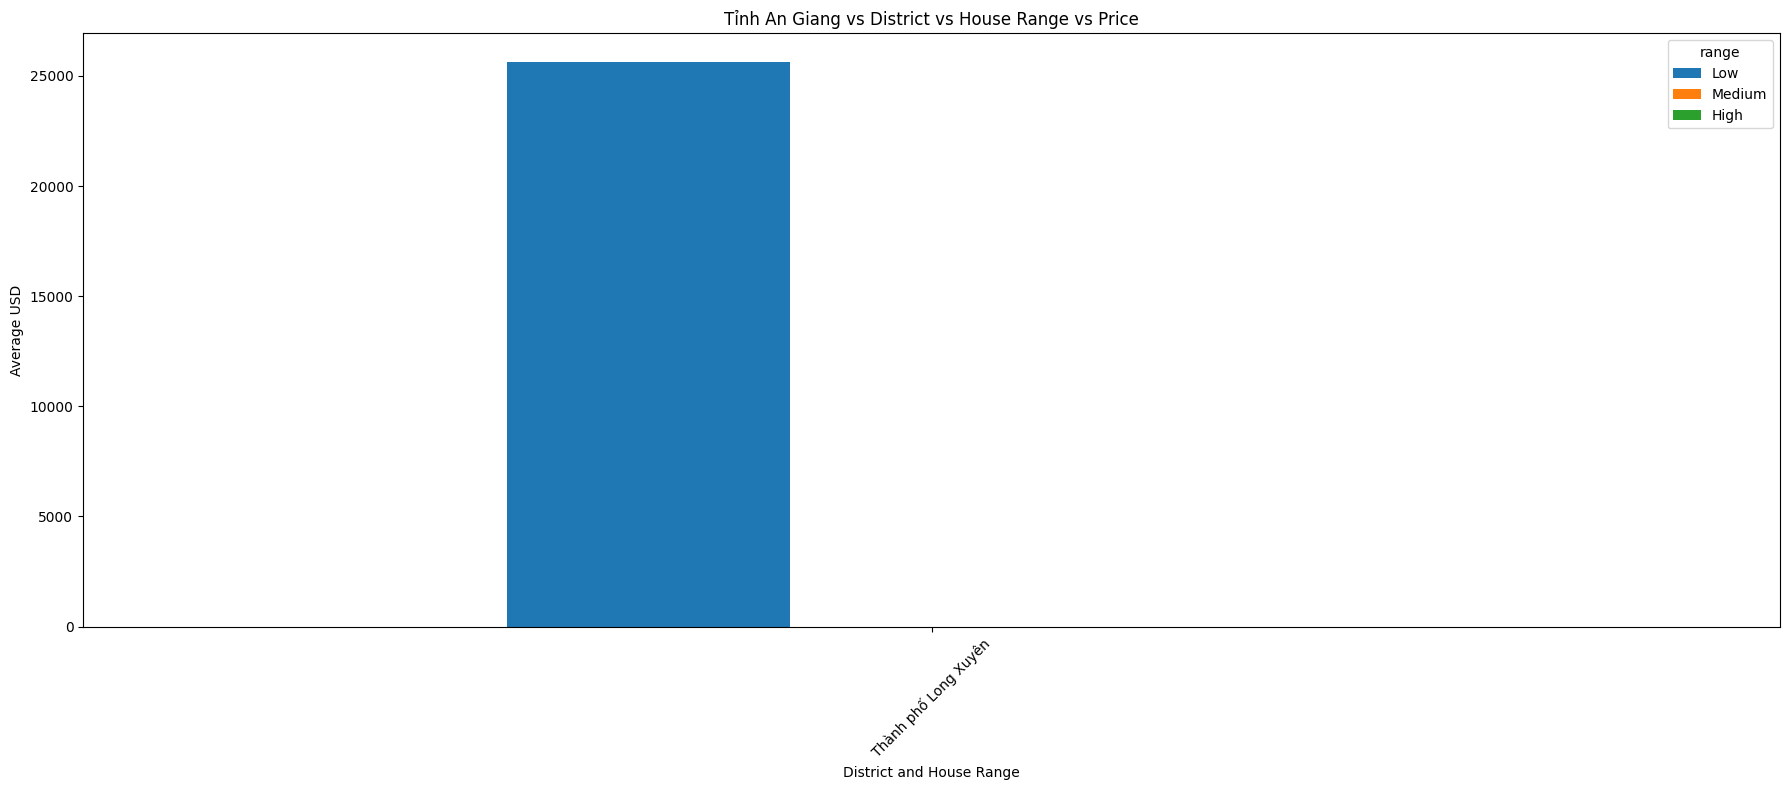

<Figure size 1800x800 with 0 Axes>

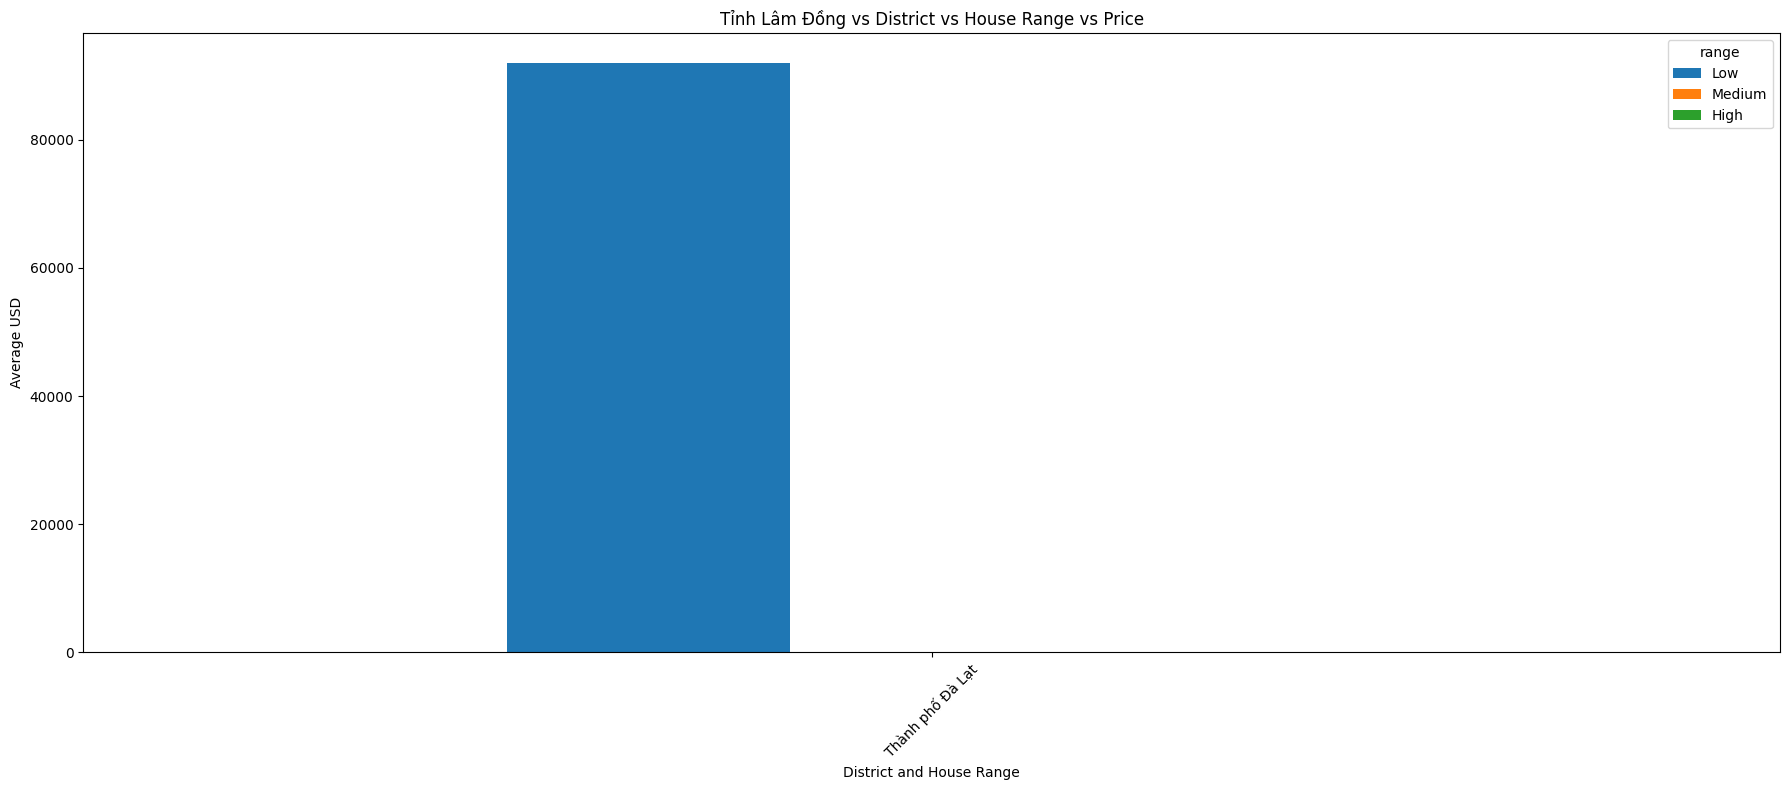

<Figure size 1800x800 with 0 Axes>

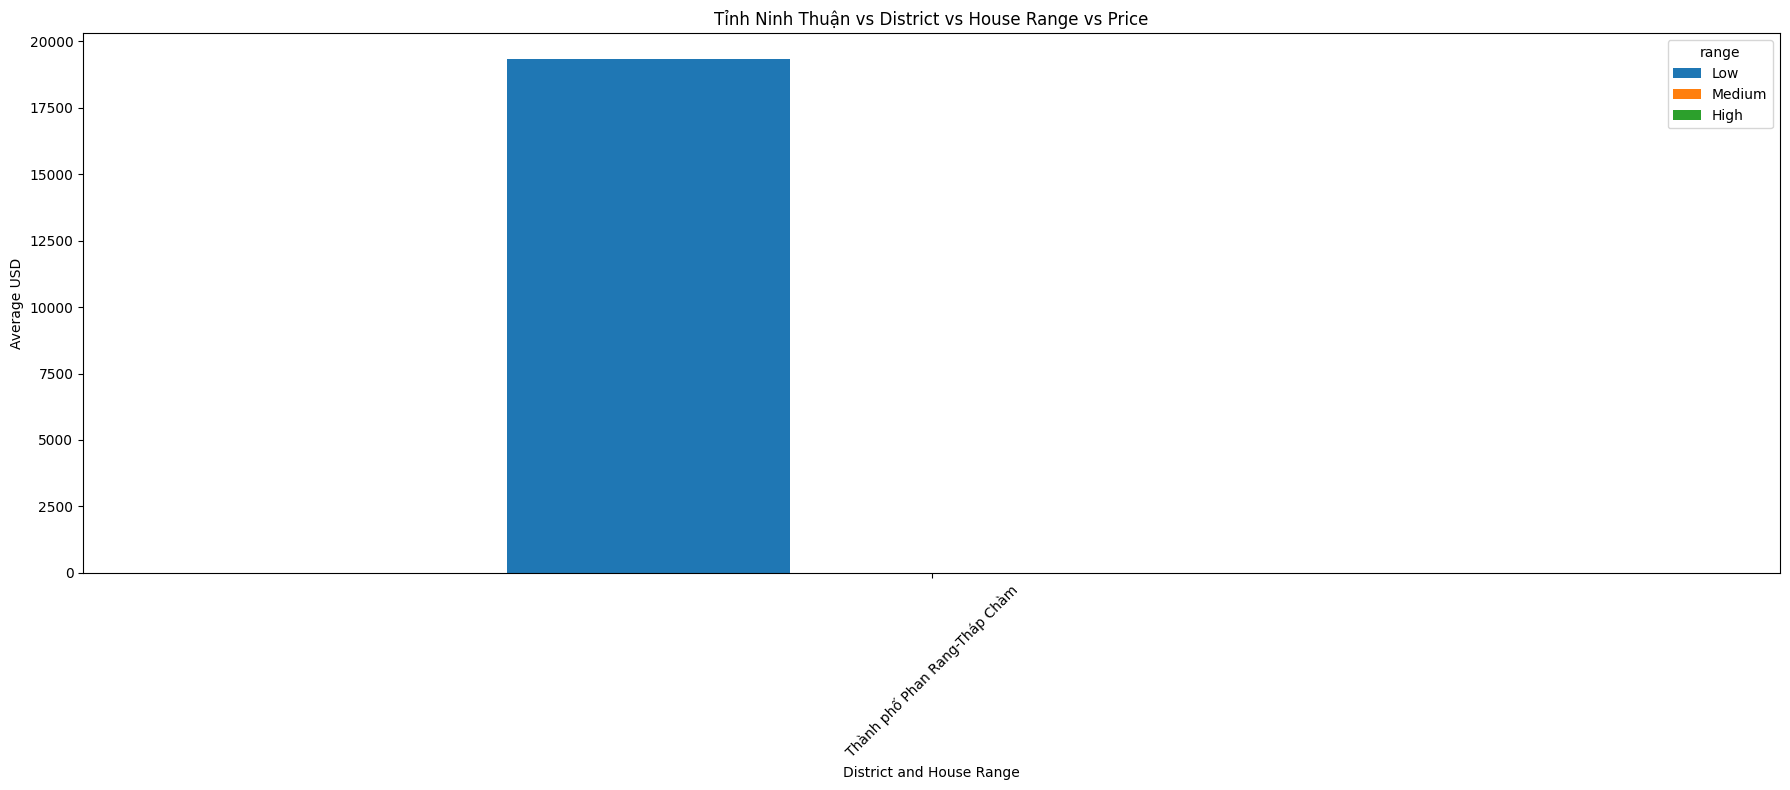

<Figure size 1800x800 with 0 Axes>

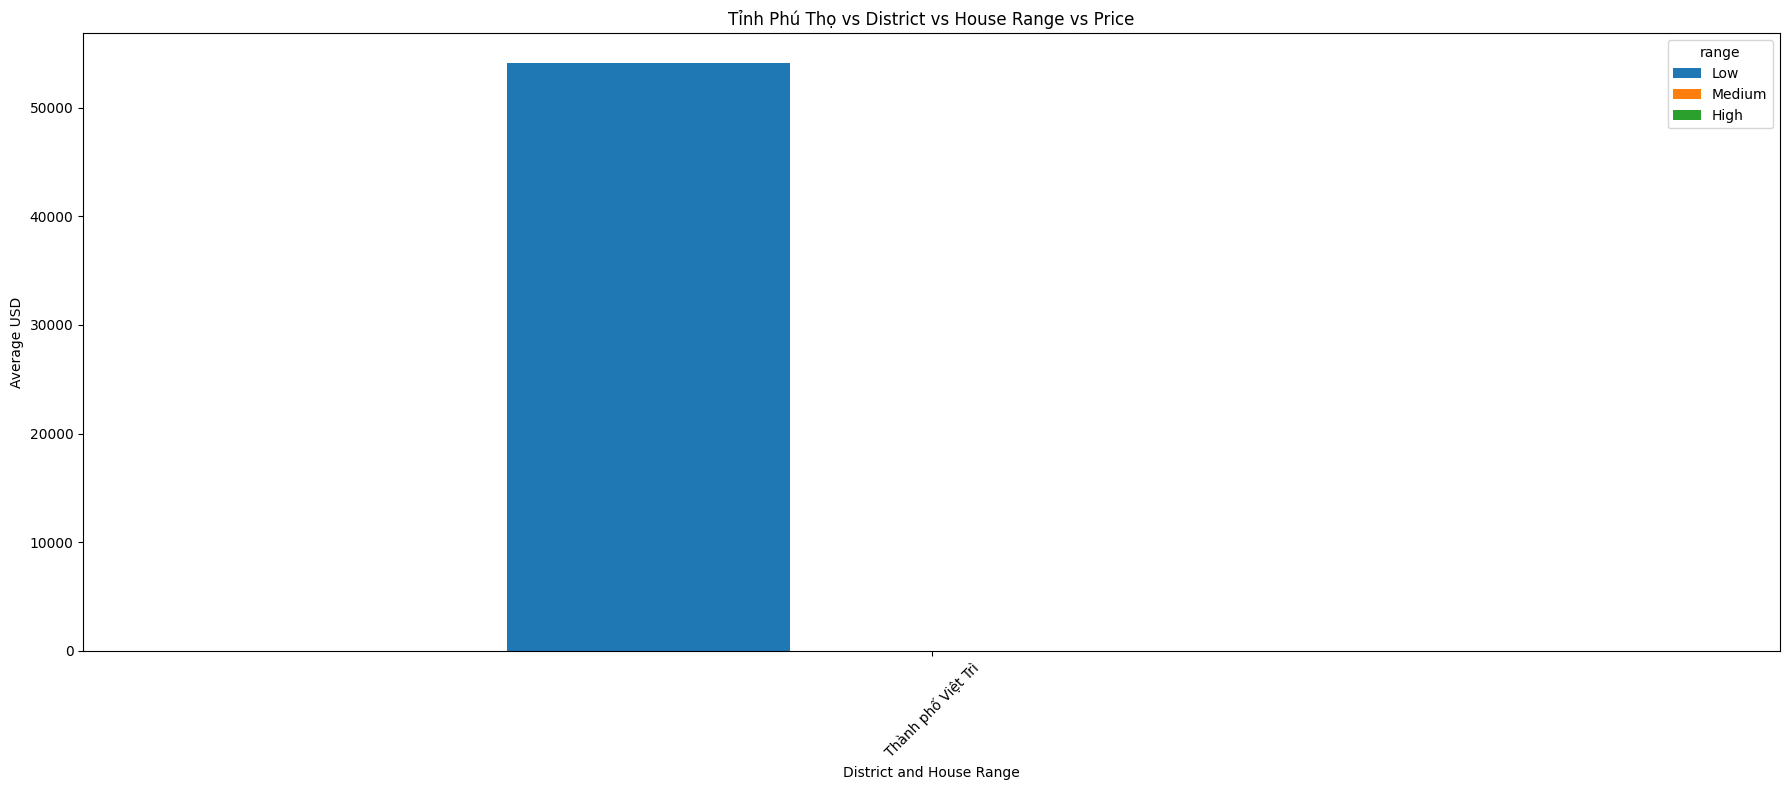

<Figure size 1800x800 with 0 Axes>

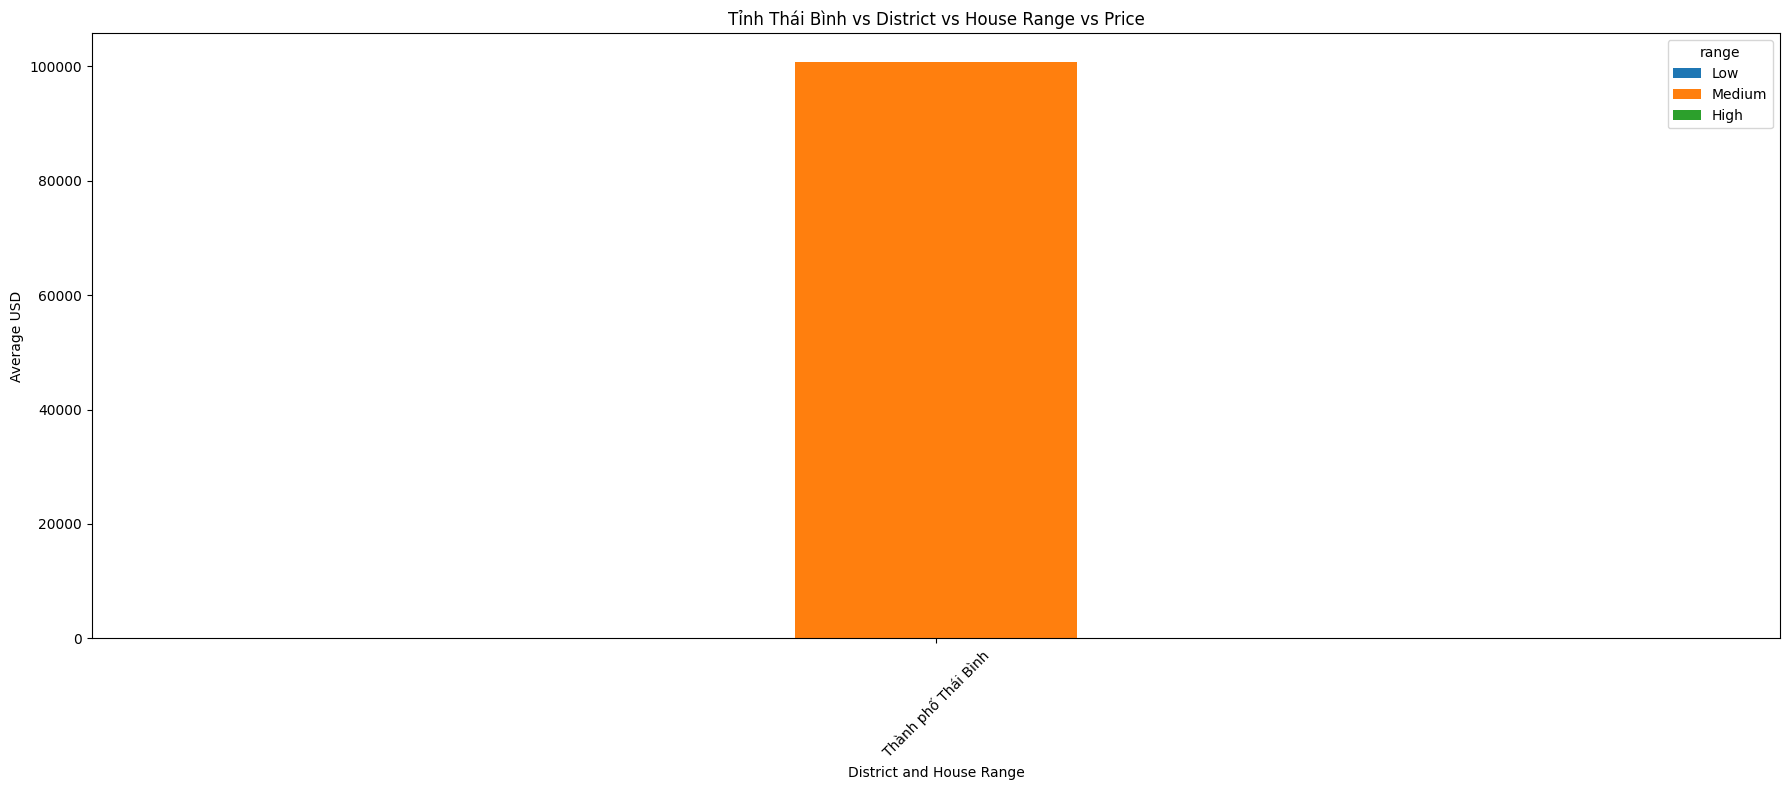

<Figure size 1800x800 with 0 Axes>

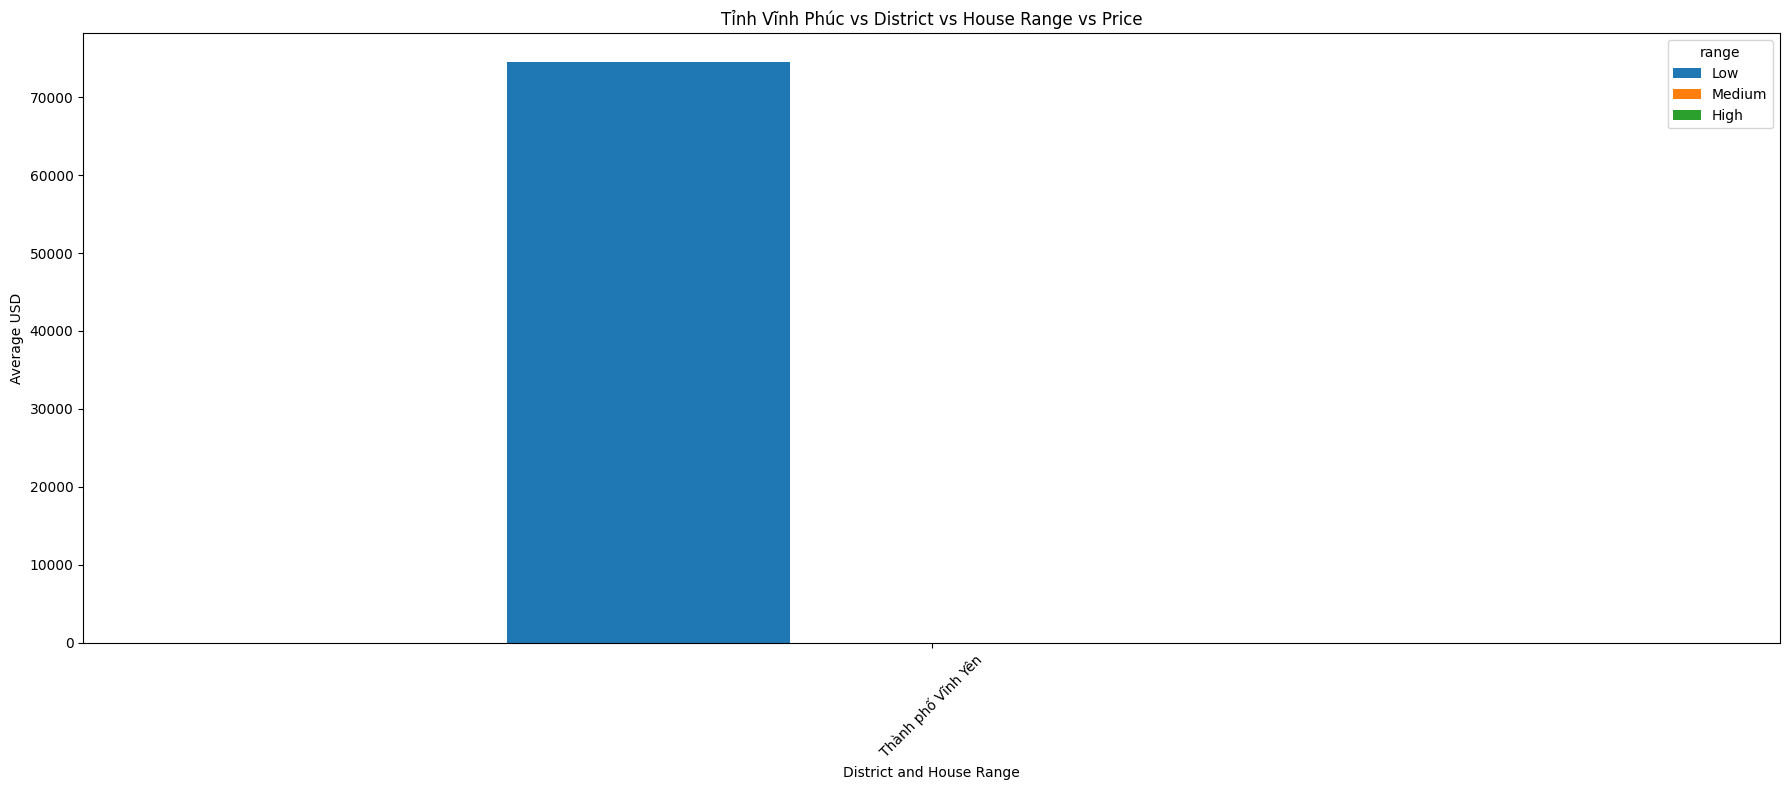

<Figure size 1800x800 with 0 Axes>

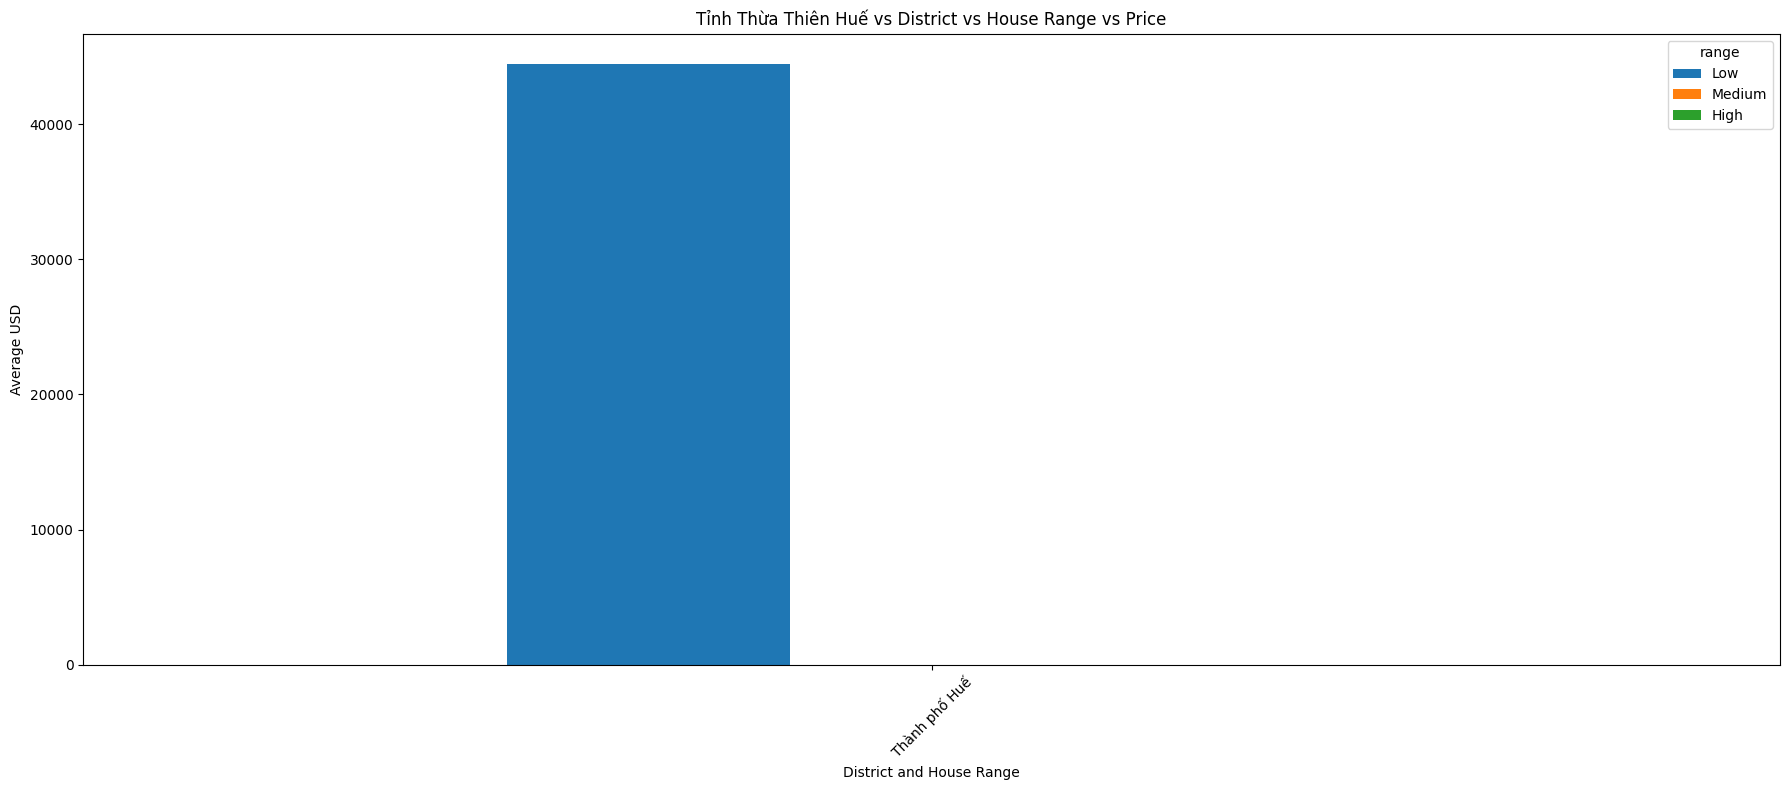

<Figure size 1800x800 with 0 Axes>

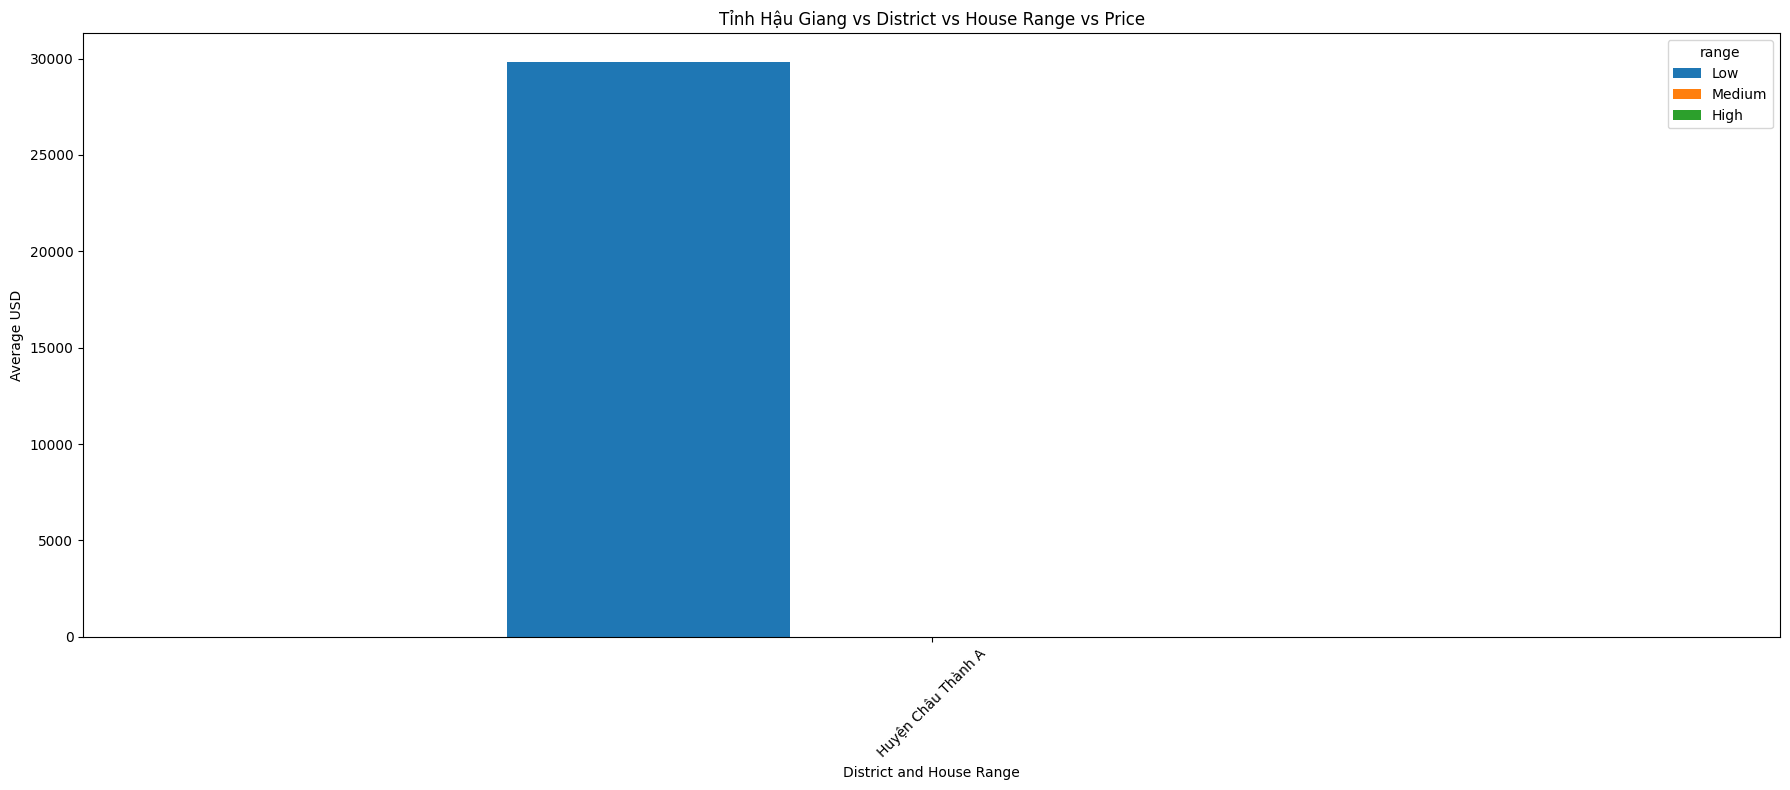

<Figure size 1800x800 with 0 Axes>

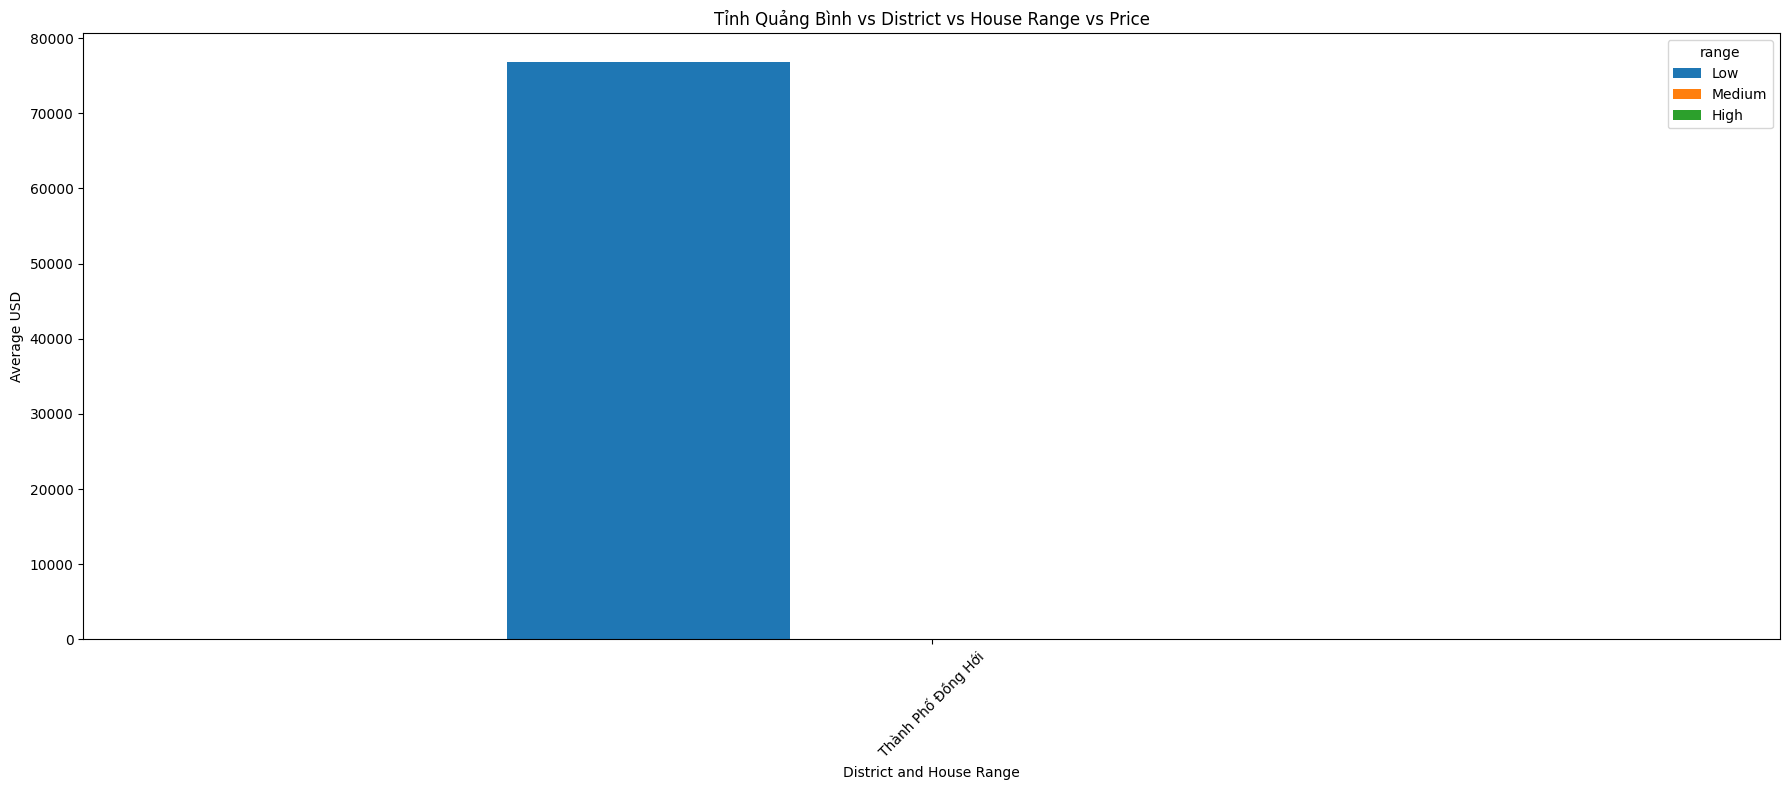

<Figure size 1800x800 with 0 Axes>

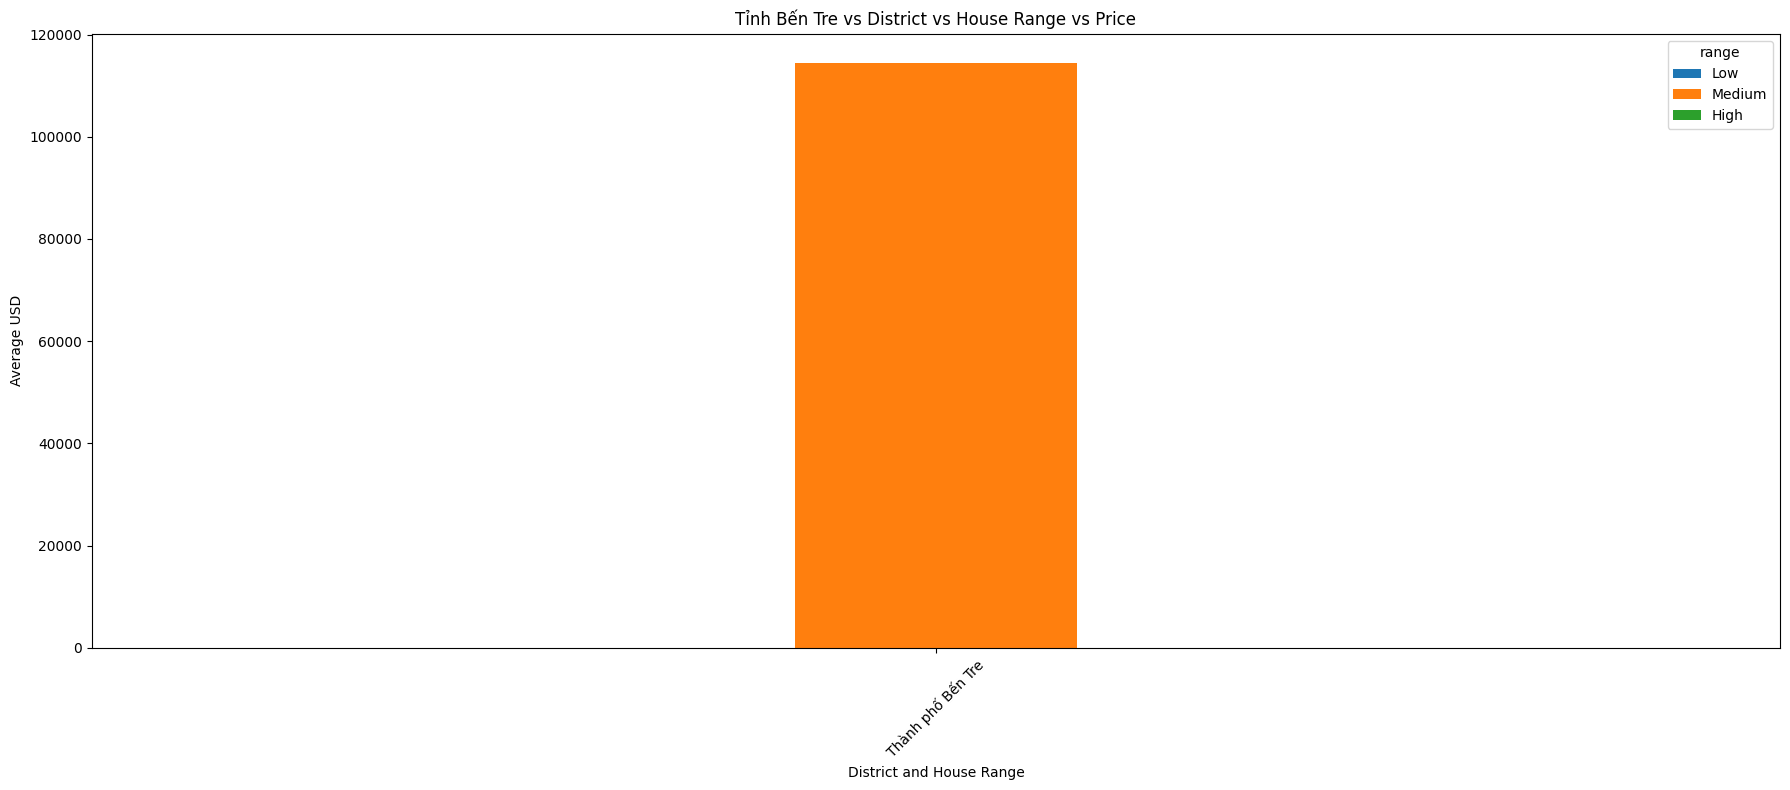

<Figure size 1800x800 with 0 Axes>

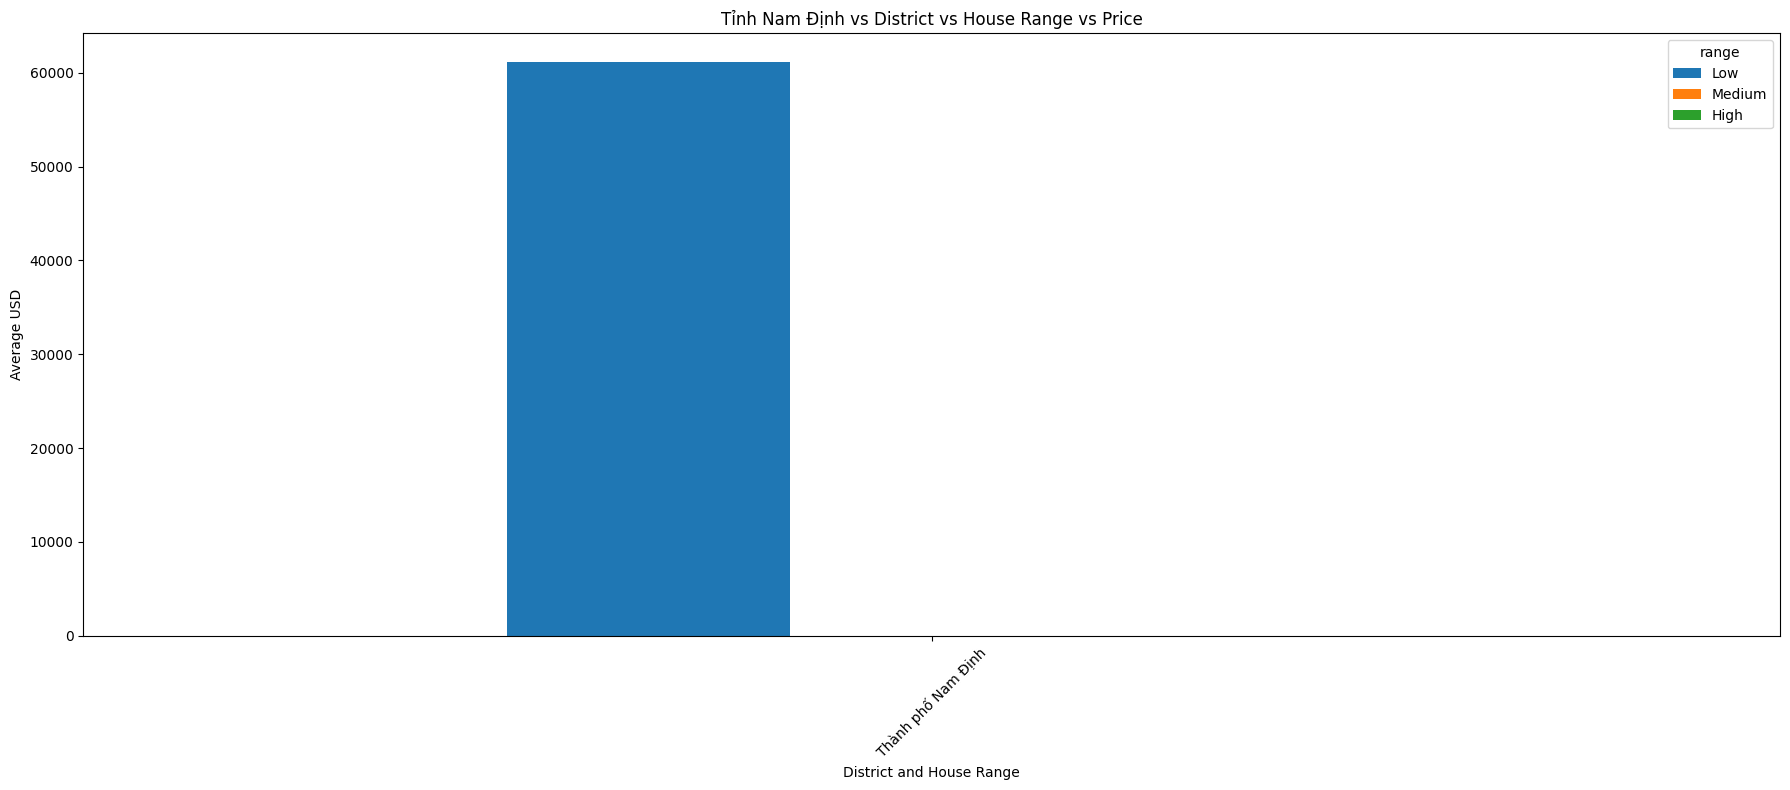

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def Analyst1(col):
    temp = frame1.copy()
    
    # Ensure 'USD' column is present
    if 'USD' not in temp.columns:
        print("Column 'USD' not found in DataFrame")
        return
    
    # Group by the column and calculate mean USD
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left', on=col, suffixes=('', '_mean'))
    
    # Define bins and labels
    bins = [0, 100000, 400000, np.inf]
    cars_bin = ['Low', 'Medium', 'High']
    
    # Create a new 'range' column based on USD values
    temp['range'] = pd.cut(temp['USD'], bins, right=False, labels=cars_bin)
    
    # Replace 'ID not found' with 'Quận 2' for 'Thành phố Hồ Chí Minh'
    if col == 'City':
        temp.loc[(temp['City'] == 'Thành phố Hồ Chí Minh') & (temp['District'] == 'ID not found'), 'District'] = 'Quận 2'
    # Create a DataFrame to store results
    results = []

    # Group by City and District to calculate mean USD
    for city in temp[col].unique():
        city_df = temp[temp[col] == city]
        
        if 'District' not in city_df.columns:
            print(f"Column 'District' not found for city: {city}")
            continue
        
        district_table = city_df.groupby('District')['USD'].mean()
        temp_district = city_df.merge(district_table.reset_index(), how='left', on='District', suffixes=('', '_district_mean'))
        
        temp_district['range'] = pd.cut(temp_district['USD_district_mean'], bins, right=False, labels=cars_bin)
        
        # Aggregate results for each city
        results.append((city, temp_district.groupby(['District', 'range'])['USD'].mean().unstack(fill_value=0)))
    
    # Plot results for each city separately
    if results:
        for city, result_df in results:
            if result_df.empty:
                print(f"No data to plot for {city}.")
                continue
            
            plt.figure(figsize=(18, 8))
            result_df.plot.bar()
            plt.title(f'{city} vs District vs House Range vs Price')
            plt.xlabel('District and House Range')
            plt.ylabel('Average USD')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("No results to plot.")

# Example usage
Analyst1('City')


##### Phân tích các quận trên toàn quốc, thấy được quận 1, quận Thủ Đức, quận Tây Hồ, quận Hoàn Kiếm có giá chung cư cao nhất nước 

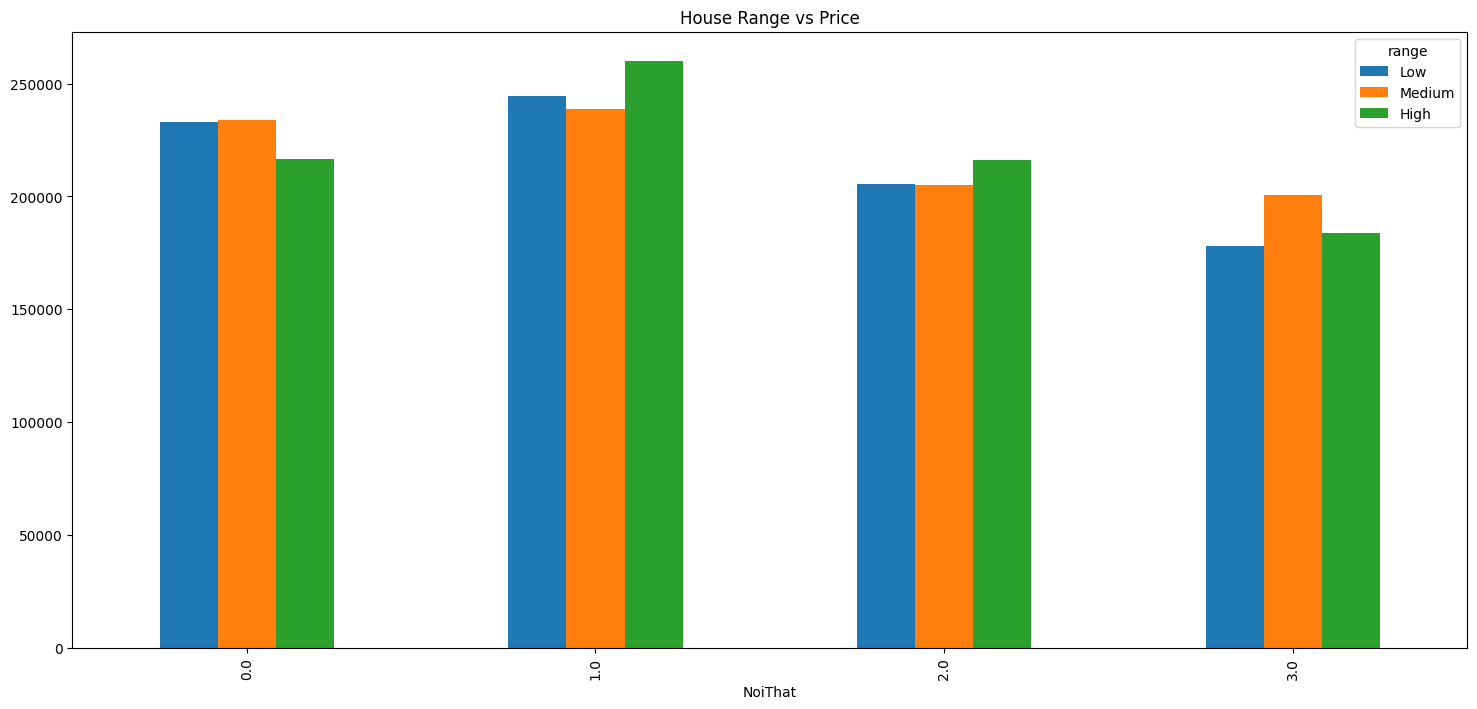

In [18]:
Analyst('NoiThat')

#### Nhà nội thất cao cấp sẽ có giá cao nhất, tiếp đến là không nội thất, giá nhà thấp nhất là nội thất cơ bản

In [19]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]


HuongBanCong
6.0    2402
5.0    1171
7.0     901
8.0     807
3.0     518
1.0     359
4.0     339
2.0     197
Name: count, dtype: int64


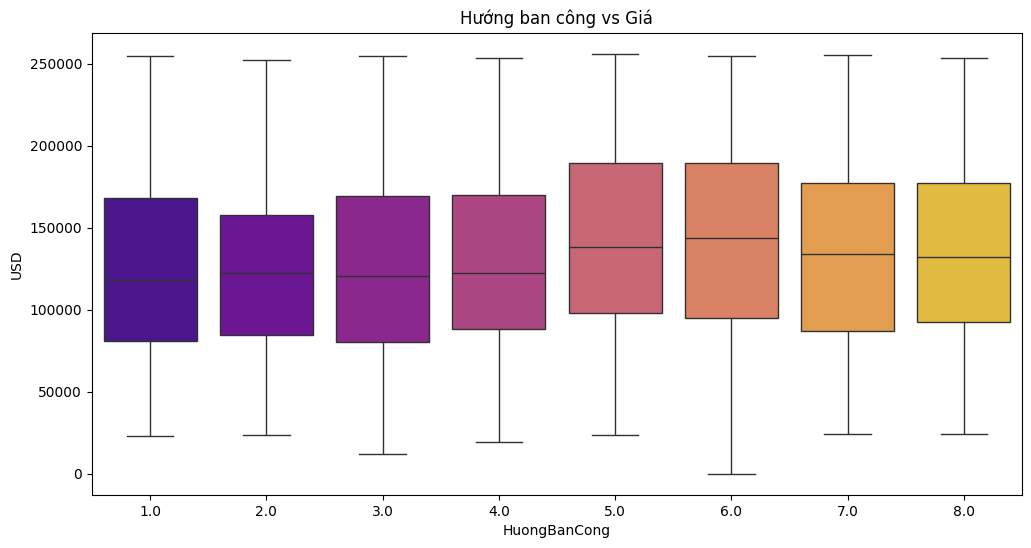

HuongNha
7.0    1499
6.0    1396
5.0     905
8.0     880
3.0     441
1.0     409
4.0     338
2.0     288
Name: count, dtype: int64


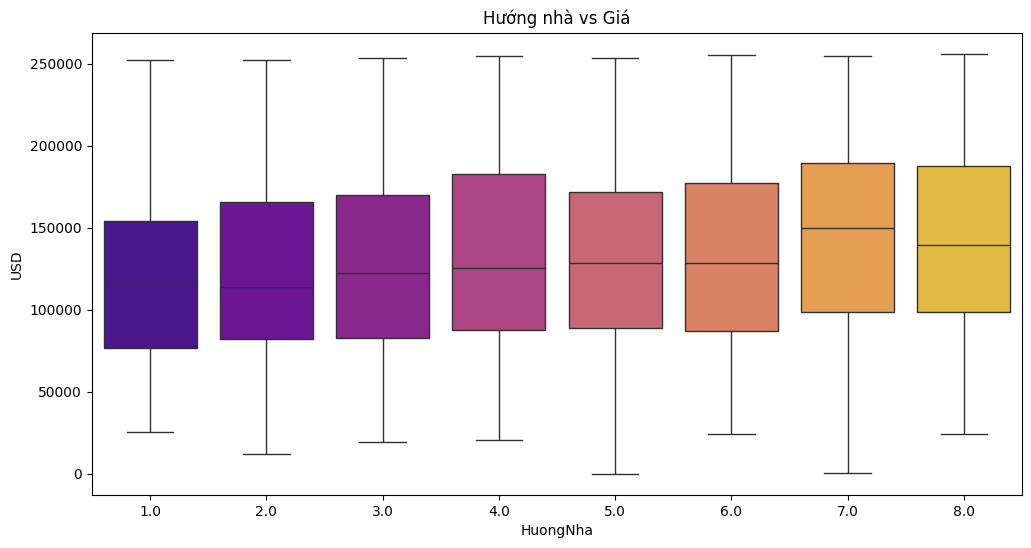

PhapLy
1.0    8808
4.0    3043
2.0     498
0.0      20
3.0       5
Name: count, dtype: int64


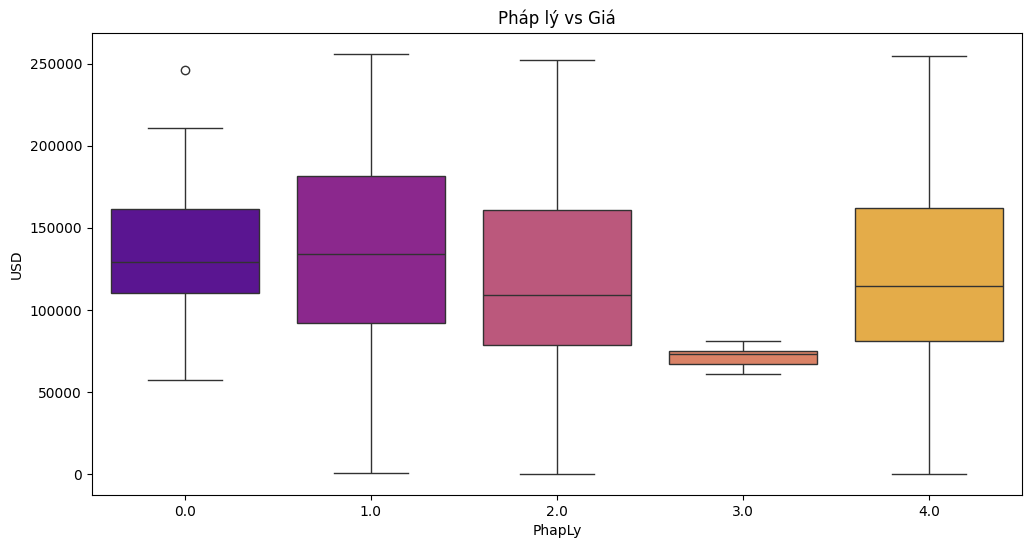

In [20]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Hướng ban công vs Giá')
plt.show()

print(test.HuongNha.value_counts())
sns.boxplot(x=test.HuongNha, y=test.USD, palette=("plasma"))
plt.title('Hướng nhà vs Giá')
plt.show()


print(test.PhapLy.value_counts())
sns.boxplot(x=test.PhapLy, y=test.USD, palette=("plasma"))
plt.title('Pháp lý vs Giá')
plt.show()

#### Có thể thấy các trường dữ liệu Hướng Ban Công, Hướng nhà, Pháp lý không ảnh hưởng quá nhiều đến nhà
#### Đa số Hướng ban công là Đông - Nam, Pháp lý là đã có sổ

# Chạy thuật toán dự đoán giá

## Linear regression

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('../../data/batdongsan/log_price/ChungCu-dataset.csv')

In [23]:
df.describe()

,DienTich,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,HuongNha,HuongBanCong,PhapLy,Ward,USD,log_price
count,21039.000000,21039.000000,20951.000000,1.886100e+04,21039.000000,21039.000000,16711.000000,21013.000000,21013.000000,8953.000000,9781.000000,17427.000000,20272.000000,1.886100e+04,18861.000000
mean,88.047679,39.094206,399.671567,5.410775e+09,2.333666,1.925139,2.135300,16.200419,106.373339,5.565397,5.529803,1.761634,14402.621498,2.134849e+05,11.952431
std,43.613522,36.778736,346.328502,2.283552e+10,0.925899,0.796689,0.675868,4.978109,0.705898,1.981594,1.762033,1.278723,12317.670769,9.009873e+05,0.708230
min,20.000000,1.000000,1.000000,1.560000e+06,1.000000,1.000000,0.000000,9.943632,103.840729,1.000000,1.000000,0.000000,4.000000,6.200000e+01,4.127134
25%,63.400000,1.000000,18.000000,2.500000e+09,2.000000,2.000000,2.000000,10.790362,105.800255,5.000000,5.000000,1.000000,571.000000,9.863900e+04,11.499222
50%,77.000000,38.000000,326.000000,3.800000e+09,2.000000,2.000000,2.000000,20.830246,106.593430,6.000000,6.000000,1.000000,14803.000000,1.499310e+05,11.917930
75%,101.000000,79.000000,767.000000,5.900000e+09,3.000000,2.000000,3.000000,21.005226,106.726097,7.000000,7.000000,2.000000,27049.000000,2.327880e+05,12.357883
max,500.000000,93.000000,932.000000,3.000000e+12,33.000000,33.000000,3.000000,22.464010,109.241501,8.000000,8.000000,4.000000,31363.000000,1.183665e+08,18.589297


In [46]:
df['USD']=df["MucGia"]/25400
df['Rank'] = df.USD.copy()
df_1 = df[df['USD'] < 40000]
df_2 = df[(df['USD'] >= 40000) & (df['USD'] < 90000)]
df_3 = df[(df['USD'] >= 90000) & (df['USD'] < 250000)]
df_4 = df[df['USD'] >= 250000]

In [47]:
df_2.head(2)

,DienTich,DiaChi,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,HuongNha,HuongBanCong,PhapLy,Ward,USD,log_price,Rank
0,50.0,"Dự án D-Aqua, Đường Bến Bình Đông, Phường 14, ...",79.0,776.0,2.250000e+09,1.0,1.0,3.0,10.739294,106.644394,NaN,NaN,NaN,27421.0,88582.677165,11.393860,88582.677165
10,42.8,"Dự án The Miami, Phường Tây Mỗ, Nam Từ Liêm, H...",1.0,19.0,2.200000e+09,1.0,1.0,NaN,21.006575,105.745049,NaN,NaN,NaN,628.0,86614.173228,11.371385,86614.173228


In [48]:
## Tìm những trường dữ liệu có giá trị NaN
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['District',
 'MucGia',
 'NoiThat',
 'Lat',
 'Long',
 'HuongNha',
 'HuongBanCong',
 'PhapLy',
 'Ward',
 'USD',
 'log_price',
 'Rank']

In [49]:
## Tỉ lệ NaN của các trường dữ liệu
df.isna().sum()/df.shape[0]*100

DienTich         0.000000
DiaChi           0.000000
City             0.000000
District         0.418271
MucGia          10.352203
SoPhongNgu       0.000000
SoToilet         0.000000
NoiThat         20.571320
Lat              0.123580
Long             0.123580
HuongNha        57.445696
HuongBanCong    53.510148
PhapLy          17.168116
Ward             3.645611
USD             10.352203
log_price       10.352203
Rank            10.352203
dtype: float64

### Drop các cột dữ liệu theo % 

In [50]:
per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [51]:
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
#df_dropped_2 = df_dropped.dropna(axis=0,thresh=int(df.shape[1]*0.5))
df_dropped_2

,DienTich,DiaChi,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,PhapLy,Ward,USD,log_price,Rank
1,50.0,"The Gold View, 346, Đường Bến Vân Đồn, Phường ...",79.0,773.0,3.700000e+09,1.0,1.0,2.0,10.756248,106.691849,4.0,27298.0,145669.291339,11.891259,145669.291339
3,110.0,"Dự án Seasons Avenue, Phường Mỗ Lao, Hà Đông, ...",1.0,268.0,5.500000e+09,3.0,2.0,2.0,20.987026,105.786835,1.0,9541.0,216535.433071,12.287676,216535.433071
5,105.5,"Dự án MHD Trung Văn, Đường Tố Hữu, Phường Trun...",1.0,19.0,5.500000e+09,3.0,2.0,0.0,20.991955,105.785103,4.0,637.0,216535.433071,12.287676,216535.433071
6,82.0,"Hei Tower Điện Lực, số 1, Phố Ngụy Như Kon Tum...",1.0,9.0,4.400000e+09,2.0,2.0,2.0,21.003246,105.805060,1.0,343.0,173228.346457,12.064532,173228.346457
8,53.0,"The Botanica, 104, Đường Phổ Quang, Phường 2, ...",79.0,766.0,3.100000e+09,1.0,1.0,2.0,10.808710,106.669357,2.0,26965.0,122047.244094,11.714330,122047.244094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,118.0,"Dự án HPC Landmark 105, Phường La Khê, Hà Đông...",1.0,268.0,5.100000e+09,3.0,2.0,2.0,20.973667,105.758713,1.0,9551.0,200787.401575,12.212169,200787.401575
21034,68.0,"Dự án Saigon Asiana, Đường Nguyễn Văn Luông, P...",79.0,775.0,3.350000e+09,2.0,2.0,3.0,10.749306,106.635384,1.0,27358.0,131889.763780,11.791890,131889.763780
21035,53.0,"Dự án The Dragon Castle, Đường Cái Lân, Phường...",22.0,193.0,1.300000e+09,2.0,2.0,2.0,20.951185,107.035522,4.0,6673.0,51181.102362,10.845290,51181.102362
21036,46.0,"Dự án Samsora Riverside, Đường Xa Lộ Hà Nội, P...",74.0,724.0,9.100000e+08,2.0,1.0,2.0,10.899458,106.832153,1.0,25954.0,35826.771654,10.488632,35826.771654


In [52]:
## Do giá tiền Việt quá lớn nên mình sẽ chuyển về dạng USD 
df_x = df_dropped_2.iloc[:, 1:12]
df_x

,DiaChi,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,PhapLy,Ward
1,"The Gold View, 346, Đường Bến Vân Đồn, Phường ...",79.0,773.0,3.700000e+09,1.0,1.0,2.0,10.756248,106.691849,4.0,27298.0
3,"Dự án Seasons Avenue, Phường Mỗ Lao, Hà Đông, ...",1.0,268.0,5.500000e+09,3.0,2.0,2.0,20.987026,105.786835,1.0,9541.0
5,"Dự án MHD Trung Văn, Đường Tố Hữu, Phường Trun...",1.0,19.0,5.500000e+09,3.0,2.0,0.0,20.991955,105.785103,4.0,637.0
6,"Hei Tower Điện Lực, số 1, Phố Ngụy Như Kon Tum...",1.0,9.0,4.400000e+09,2.0,2.0,2.0,21.003246,105.805060,1.0,343.0
8,"The Botanica, 104, Đường Phổ Quang, Phường 2, ...",79.0,766.0,3.100000e+09,1.0,1.0,2.0,10.808710,106.669357,2.0,26965.0
...,...,...,...,...,...,...,...,...,...,...,...
21032,"Dự án HPC Landmark 105, Phường La Khê, Hà Đông...",1.0,268.0,5.100000e+09,3.0,2.0,2.0,20.973667,105.758713,1.0,9551.0
21034,"Dự án Saigon Asiana, Đường Nguyễn Văn Luông, P...",79.0,775.0,3.350000e+09,2.0,2.0,3.0,10.749306,106.635384,1.0,27358.0
21035,"Dự án The Dragon Castle, Đường Cái Lân, Phường...",22.0,193.0,1.300000e+09,2.0,2.0,2.0,20.951185,107.035522,4.0,6673.0
21036,"Dự án Samsora Riverside, Đường Xa Lộ Hà Nội, P...",74.0,724.0,9.100000e+08,2.0,1.0,2.0,10.899458,106.832153,1.0,25954.0


In [53]:
df_y = df_dropped_2.iloc[:, 13]
df_y

1        11.891259
3        12.287676
5        12.287676
6        12.064532
8        11.714330
           ...    
21032    12.212169
21034    11.791890
21035    10.845290
21036    10.488632
21038    11.519027
Name: log_price, Length: 13091, dtype: float64

### Get dummies values 

In [55]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,City,District,MucGia,SoPhongNgu,SoToilet,NoiThat,Lat,Long,PhapLy,Ward,...,"DiaChi_Đường Đại Cồ Việt, Phường Bách Khoa, Hai Bà Trưng, Hà Nội","DiaChi_Đường Đại Cồ Việt, Phường Bách Khoa, Hai Bà Trưng, Hà Nội.","DiaChi_Đường Đại Cồ Việt, Phường Lê Đại Hành, Hai Bà Trưng, Hà Nội","DiaChi_Đường Đại Lộ Hùng Vương, Phường Quảng Thành, Thanh Hóa, Thanh Hóa.","DiaChi_Đường Đại Từ, Phường Đại Kim, Hoàng Mai, Hà Nội","DiaChi_Đường Đền Lừ, Phường Hoàng Văn Thụ, Hoàng Mai, Hà Nội","DiaChi_Đường Định Công, Phường Định Công, Hoàng Mai, Hà Nội","DiaChi_Đường Đồng Khởi, Phường Tam Hòa, Biên Hòa, Đồng Nai","DiaChi_Đường Đội Nhân, Phường Vĩnh Phúc, Ba Đình, Hà Nội","DiaChi_Đạt Gia Residence, 38, Đường Cây Keo, Phường Tam Phú, Thủ Đức, Hồ Chí Minh"
1,79.0,773.0,3.700000e+09,1.0,1.0,2.0,10.756248,106.691849,4.0,27298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,268.0,5.500000e+09,3.0,2.0,2.0,20.987026,105.786835,1.0,9541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,19.0,5.500000e+09,3.0,2.0,0.0,20.991955,105.785103,4.0,637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,9.0,4.400000e+09,2.0,2.0,2.0,21.003246,105.805060,1.0,343.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,79.0,766.0,3.100000e+09,1.0,1.0,2.0,10.808710,106.669357,2.0,26965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,1.0,268.0,5.100000e+09,3.0,2.0,2.0,20.973667,105.758713,1.0,9551.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21034,79.0,775.0,3.350000e+09,2.0,2.0,3.0,10.749306,106.635384,1.0,27358.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21035,22.0,193.0,1.300000e+09,2.0,2.0,2.0,20.951185,107.035522,4.0,6673.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21036,74.0,724.0,9.100000e+08,2.0,1.0,2.0,10.899458,106.832153,1.0,25954.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scale data về dạng chuẩn

In [56]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [57]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[ 1.12152719,  1.1087846 , -0.24535468, ..., -0.00874038,
        -0.00874038, -0.00874038],
       [-0.99606416, -0.34238796,  0.04588019, ..., -0.00874038,
        -0.00874038, -0.00874038],
       [-0.99606416, -1.0579166 ,  0.04588019, ..., -0.00874038,
        -0.00874038, -0.00874038],
       ...,
       [-0.42594342, -0.55790863, -0.63366784, ..., -0.00874038,
        -0.00874038, -0.00874038],
       [ 0.98578415,  0.96797776, -0.69676873, ..., -0.00874038,
        -0.00874038, -0.00874038],
       [-0.99606416, -1.06079021, -0.4314214 , ..., -0.00874038,
        -0.00874038, -0.00874038]])

### Split data 80% để train , 20% để test

In [58]:
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

### Linear

In [59]:
reg = LinearRegression().fit(X, Y)

In [60]:
reg.predict(X_test)

array([ 1.09005127e+01, -1.21884331e+14,  1.21112671e+01, ...,
        1.22709808e+01,  1.24424133e+01,  1.21382446e+01])

In [61]:
Y_test

559      11.008198
19807    12.231589
4604     11.943909
14220    11.458395
9505     11.300771
           ...    
2880     11.240447
10368    10.347211
20665    12.151543
2805     12.543023
6581     12.108983
Name: log_price, Length: 2619, dtype: float64

In [62]:
Y_pre = reg.predict(X_test)

In [63]:
perc = np.abs((Y_pre - Y_test)/Y_test)
perc = perc.values*100

In [64]:
np.array([Y_pre, Y_test, perc])

array([[ 1.09005127e+01, -1.21884331e+14,  1.21112671e+01, ...,
         1.22709808e+01,  1.24424133e+01,  1.21382446e+01],
       [ 1.10081979e+01,  1.22315893e+01,  1.19439089e+01, ...,
         1.21515425e+01,  1.25430233e+01,  1.21089834e+01],
       [ 9.78227162e-01,  9.96471738e+14,  1.40120149e+00, ...,
         9.82906452e-01,  8.02119284e-01,  2.41649062e-01]])

In [65]:
data = {'Gia du doan':Y_pre,
        'Gia thuc':Y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)

In [66]:
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
19426,1.225995e+01,12.260026,6.273990e-04
19458,1.228754e+01,12.287676,1.131643e-03
1866,1.272284e+01,12.722996,1.228382e-03
5049,1.078973e+01,10.789937,1.886533e-03
14404,1.189984e+01,11.899609,1.955391e-03
...,...,...,...
18344,3.567843e+14,11.959174,2.983352e+15
765,3.795497e+14,11.612545,3.268446e+15
7233,-3.912630e+14,11.943909,3.275837e+15
12094,4.106680e+14,12.041546,3.410426e+15


In [67]:
B['% sai lech'].describe()

count    2.619000e+03
mean     1.025132e+14
std      3.652065e+14
min      6.273990e-04
25%      3.772726e-01
50%      8.546910e-01
75%      1.890819e+00
max      3.461269e+15
Name: % sai lech, dtype: float64

### Tính sai lệch trung bình

In [68]:
(sum((reg.predict(X_test) - Y_test)**2)/len(Y_test))**0.5

44366460712923.24

**Nhận xét:** Sai lệch trung bình của dataset là khoảng 44366460712923 usd 